## Table of Contents
* [Project Objectives](#Project_Objectives)
* [Data](#Data)
    * [About the dataset](#section1_1)
    * [Where to find the dataset](#section1_2)
    * [Load the dataset and packages](#section1_3)
    * [Data Information](#section1_4)
    * [Data Cleaning](#section1_5)
* [Exploratory Data Analysis](#EDA)
    * [Purchasing Behavior by Income](#section2_1)
    * [Purchasing Behavior by Age](#section2_2)
    * [Purchasing Behavior by Civil Status](#section2_3)
    * [Purchasing Behavior by Family](#section2_4)
    * [Complainings](#section2_5)
* [Conclusion](#conclusion)

### Project Objectives <a class="anchor" id="Project_Objectives"></a>

* Get acquainted with the dataset
* 'Tidy' the dataset
* Analyze the variables within the dataset to find some relevant insights
* Reach conclusions and develop recommendations

### Data <a class="anchor" id="Data"></a>

#### About the dataset <a class="anchor" id="section1_1"></a>

iFood is a Brazilian online food ordering and delivery platform, founded in 2011. It operates primarily in Brazil and Colombia, holding over 80% of the market share in Brazil. The company allows customers to order food from various restaurants through its mobile app or website. In this project, we are going to work with a marketing dataset from this company.

#### Where to find the dataset <a class="anchor" id="section1_2"></a>

The data was downloaded from [here](https://github.com/nailson/ifood-data-business-analyst-test/blob/master/ifood_df.csv)

#### Load the dataset and packages <a class="anchor" id="section1_3"></a>

```python
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Import the dataset
data = pd.read_csv("ifood_df.csv")
# See all columns
pd.set_option('display.max_columns', None)
data.head(10)
````

In [153]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Import the dataset
data = pd.read_csv("/Users/juan/Desktop/150724/Estudios/Python/Project/DDBB/ifood_df.csv")
# See all columns
pd.set_option('display.max_columns', None)
data.head(10)

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   
5  62513.0        0         1       16       520         42               98   
6  55635.0        0         1       34       235         65              164   
7  33454.0        1         0       32        76         10               56   
8  30351.0        1         0       19        14          0               24   
9   5648.0        1         1       68        28          0                6   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   
5                0                42            14                  2   
6               50                49            27                  4   
7                3                 1            23                  2   
8                3                 3             2                  1   
9                1                 1            13                  1   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   
5                6                    4                 10                  6   
6                7                    3                  7                  6   
7                4                    0                  4                  8   
8                3                    0                  2                  9   
9                1                    0                  0                 20   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   
5             0             0             0             0             0   
6             0             0             0             0             0   
7             0             0             0             0             0   
8             0             0             0             0             0   
9             1             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Age  Customer_Days  \
0         0              3         11         1   63           2822   
1         0              3         11         0   66           2272   
2         0              3         11         0   55           2471   
3         0              3         11         0   36           2298   
4         0              3         11         0   39           2320   
5         0              3         11         0   53           2452   
6         0              3         11         0   49           2752   
7         0              3       

#### Data Information <a class="anchor" id="section1_4"></a>

About the dataset:
* Most columns in the dataset are integers.
* There are 2205 rows and 39 columns.
* For future analysis, we will create new columns.
* Some basic summary statistics for each of the numerical variables.
* There are some duplicate rows (184).
* There are some columns that we need to fix (MntRegularProds) and other columns that are not useful for our analysis, so we are going to delete these.
* There are no missing values.

```python
# Data Types
print(f"The dataset data types are: \n{data.dtypes}")
# Numbers of rows and columns
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]} ")
# Duplicate rows
print(f"The number of duplicated rows are: {data.duplicated().sum()}")
# Summary statistics  
data.describe(include="all")
# Missing values
data.isna().sum()
```

In [154]:
# Data Types
print(f"The dataset data types are: \n{data.dtypes}")
# Numbers of rows and columns
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]} ")
# Duplicate rows
print(f"The number of duplicated rows are: {data.duplicated().sum()}")
# Missing values
print(data.isna().sum())
# Summary statistics  
data.describe(include="all")


The dataset data types are: 
Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Wid

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         34.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2205.000000        2205.000000      2205.000000          2205.000000   
mean      44.057143           2.318367         4.100680             2.645351   
std       51.736211           1.886107         2.737424             2.798647   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       25.000000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      321.000000          15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2205.000000        2205.000000   2205.000000   2205.000000   
mean            5.823583           5.336961      0.073923      0.074376   
std             3.241796           2.413535      0.261705      0.262442   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2205.000000   2205.000000   2205.000000  2205.000000         2205.0   
mean       0.073016      0.064399      0.013605     0.009070            3.0   
std        0.260222      0.245518      0.115872     0.094827            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue    Response          Age  Customer_Days  marital_Divorced  \
count     2205.0  2205.00000  2205.000000    2205.000000       2205.000000   
mean        11.0     0.15102    51.095692    2512.718367          0.104308   
std          0.0     0.35815    11.705801     202.563647          0.305730   
min         11.0     0.00000    24.000000    2159.000000          0.000000   
25%         11.0     0.00000    43.000000    2339.000000          0.000000   
50%         11.0     0.00000    50.000000    2515.000000          0.000000   
75%    

#### Data Cleaning <a class="anchor" id="section1_5"></a>
We are going to follow the steps explained in the previous section:
* Delete the duplicate rows
* Delete and fix the columns
* Create the new columns"
```python
# Delete the duplicates
data = data.drop_duplicates()
data.shape
# Delete columns
data.drop(["Z_CostContact","Z_Revenue","MntTotal","MntRegularProds"],axis=1, inplace=True)
# New columns
data["Total_Spent"] = data[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]].sum(axis=1)
data["Civil_Status"] = data.apply(lambda row: 'Divorced' if row['marital_Divorced'] == 1 else
                                              'Married' if row['marital_Married'] == 1 else
                                              'Single' if row['marital_Single'] == 1 else
                                               'Together'        if row['marital_Together'] == 1 else
                                               'Widow' if row['marital_Widow'] == 1 else
                                               'uknown', axis=1
                                  )

data["Spent_Level"] = data.apply(lambda row: 'Low' if row["Total_Spent"] <= 1500 else
                                            'Medium' if row["Total_Spent"] <= 3000 else
                                            'High',axis=1    
                                            )
data["Education"] = data.apply(lambda row:                                              
                                            "2ndCycle" if row["education_2n Cycle"] == 1 else
                                            "BasicEducation" if row["education_Basic"] == 1 else
                                            "Graduate" if row["education_Graduation"] == 1 else
                                            "Master" if row["education_Master"] == 1 else
                                            "Phd" if row["education_PhD"] == 1 else
                                            "Uknown"
                                            ,axis=1)
data["Age_Group"] = data.apply(lambda row:
                                            "24-38" if row["Age"] <=38 else 
                                            "39-53" if row["Age"] <=53 else
                                            "54-68" if row["Age"] <=68 else 
                                            "69 and older" , axis=1)
data["Children"] = data.apply(lambda row:
                                            "No childs" if (row['Kidhome'] == 0 and row['Teenhome'] == 0) else
                                            "Teen(s)" if (row['Kidhome'] == 0 and row['Teenhome'] > 0 ) else
                                            "Kid(s)" if (row['Kidhome'] > 0 and row['Teenhome'] == 0) else
                                            "Both" if (row['Kidhome'] > 0 and row['Teenhome'] > 0) else ""
                                            ,axis=1)    
```

In [155]:
# Delete the duplicates
data = data.drop_duplicates()
data.shape
# Delete columns
data.drop(["Z_CostContact","Z_Revenue","MntTotal","MntRegularProds"],axis=1, inplace=True)
# New columns
data["Total_Spent"] = data[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]].sum(axis=1)
data["Num_Orders"] = data[["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]].sum(axis=1)
data["Civil_Status"] = data.apply(lambda row: 'Divorced' if row['marital_Divorced'] == 1 else
                                              'Married' if row['marital_Married'] == 1 else
                                              'Single' if row['marital_Single'] == 1 else
                                               'Together'        if row['marital_Together'] == 1 else
                                               'Widow' if row['marital_Widow'] == 1 else
                                               'uknown', axis=1
                                  )

data["Spent_Level"] = data.apply(lambda row: 'Low' if row["Total_Spent"] <= 850 else
                                            'Medium' if row["Total_Spent"] <= 1700 else
                                            'High',axis=1    
                                            )
data["Education"] = data.apply(lambda row:                                              
                                            "2ndCycle" if row["education_2n Cycle"] == 1 else
                                            "BasicEducation" if row["education_Basic"] == 1 else
                                            "Graduate" if row["education_Graduation"] == 1 else
                                            "Master" if row["education_Master"] == 1 else
                                            "Phd" if row["education_PhD"] == 1 else
                                            "Uknown"
                                            ,axis=1)
data["Age_Group"] = data.apply(lambda row:
                                            "24-38" if row["Age"] <=38 else 
                                            "39-53" if row["Age"] <=53 else
                                            "54-68" if row["Age"] <=68 else 
                                            "69 and older" , axis=1)
data["Children"] = data.apply(lambda row:
                                            "No childs" if (row['Kidhome'] == 0 and row['Teenhome'] == 0) else
                                            "Teen(s)" if (row['Kidhome'] == 0 and row['Teenhome'] > 0 ) else
                                            "Kid(s)" if (row['Kidhome'] > 0 and row['Teenhome'] == 0) else
                                            "Both" if (row['Kidhome'] > 0 and row['Teenhome'] > 0) else ""
                                            ,axis=1)    

data.describe(include="all")

Income      Kidhome     Teenhome      Recency     MntWines  \
count     2021.000000  2021.000000  2021.000000  2021.000000  2021.000000   
unique            NaN          NaN          NaN          NaN          NaN   
top               NaN          NaN          NaN          NaN          NaN   
freq              NaN          NaN          NaN          NaN          NaN   
mean     51687.258783     0.443345     0.509649    48.880752   306.492331   
std      20713.046401     0.536196     0.546393    28.950917   337.603877   
min       1730.000000     0.000000     0.000000     0.000000     0.000000   
25%      35416.000000     0.000000     0.000000    24.000000    24.000000   
50%      51412.000000     0.000000     0.000000    49.000000   178.000000   
75%      68274.000000     1.000000     1.000000    74.000000   507.000000   
max     113734.000000     2.000000     2.000000    99.000000  1493.000000   

          MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count   2021.000000      2021.000000      2021.000000       2021.000000   
unique          NaN              NaN              NaN               NaN   
top             NaN              NaN              NaN               NaN   
freq            NaN              NaN              NaN               NaN   
mean      26.364671       166.059871        37.603662         27.268679   
std       39.776518       219.869126        54.892196         41.575454   
min        0.000000         0.000000         0.000000          0.000000   
25%        2.000000        16.000000         3.000000          1.000000   
50%        8.000000        68.000000        12.000000          8.000000   
75%       33.000000       230.000000        50.000000         34.000000   
max      199.000000      1725.000000       259.000000        262.000000   

        MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count    2021.000000        2021.000000      2021.000000          2021.000000   
unique           NaN                NaN              NaN                  NaN   
top              NaN                NaN              NaN                  NaN   
freq             NaN                NaN              NaN                  NaN   
mean       43.921821           2.330035         4.115289             2.644730   
std        51.678211           1.892778         2.753588             2.799126   
min         0.000000           0.000000         0.000000             0.000000   
25%         9.000000           1.000000         2.000000             0.000000   
50%        25.000000           2.000000         4.000000             2.000000   
75%        56.000000           3.000000         6.000000             4.000000   
max       321.000000          15.000000        27.000000            28.000000   

        NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count         2021.000000        2021.000000   2021.000000   2021.000000   
unique                NaN                NaN           NaN           NaN   
top                   NaN                NaN           NaN           NaN   
freq                  NaN                NaN           NaN           NaN   
mean             5.807521           5.340426      0.074715      0.076695   
std              3.230434           2.426319      0.262997      0.266172   
min              0.000000           0.000000      0.000000      0.000000   
25%              3.000000           3.000000      0.000000      0.000000   
50%              5.000000           6.000000      0.000000      0.000000   
75%              8.000000           7.000000      0.000000      0.000000   
max             13.000000          20.000000      1.000000      1.000000   

        AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count    2021.000000   2021.000000   2021.000000  2021.000000  2021.000000   
unique           NaN           NaN           NaN          NaN          NaN   
top              NaN           NaN           NaN          NaN        

### Exploratory Data Analysis EDA <a class="anchor" id="EDA"></a>

First, we want to see the distribution of the variables. We create histogram plots for all the variables. Additionally, we want to visualize the correlation, so we plot a correlation matrix.

```python
# Names of all the columns
col_names = [name for name in data.columns]
fig, axes = plt.subplots(len(col_names) // 3 + 1, 3, figsize=(18, 24))
axes = axes.flatten()

for i, colname in enumerate(col_names):
    sns.histplot(data[colname], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {colname}')

# Hiding missing plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlation Heatmap
numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(34, 20))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.show()
```

**Findings:**
* Many histograms show a right-skewed distribution.
* The `Income` and `Age` columns appear to follow a normal, symmetrical distribution.
* The heatmap shows that Income has some correlation with variables like `MntWines`, `MntMeatProducts`, `NumCatalogPurchases`, `Total_Spent`, and `Num_Purchases`.


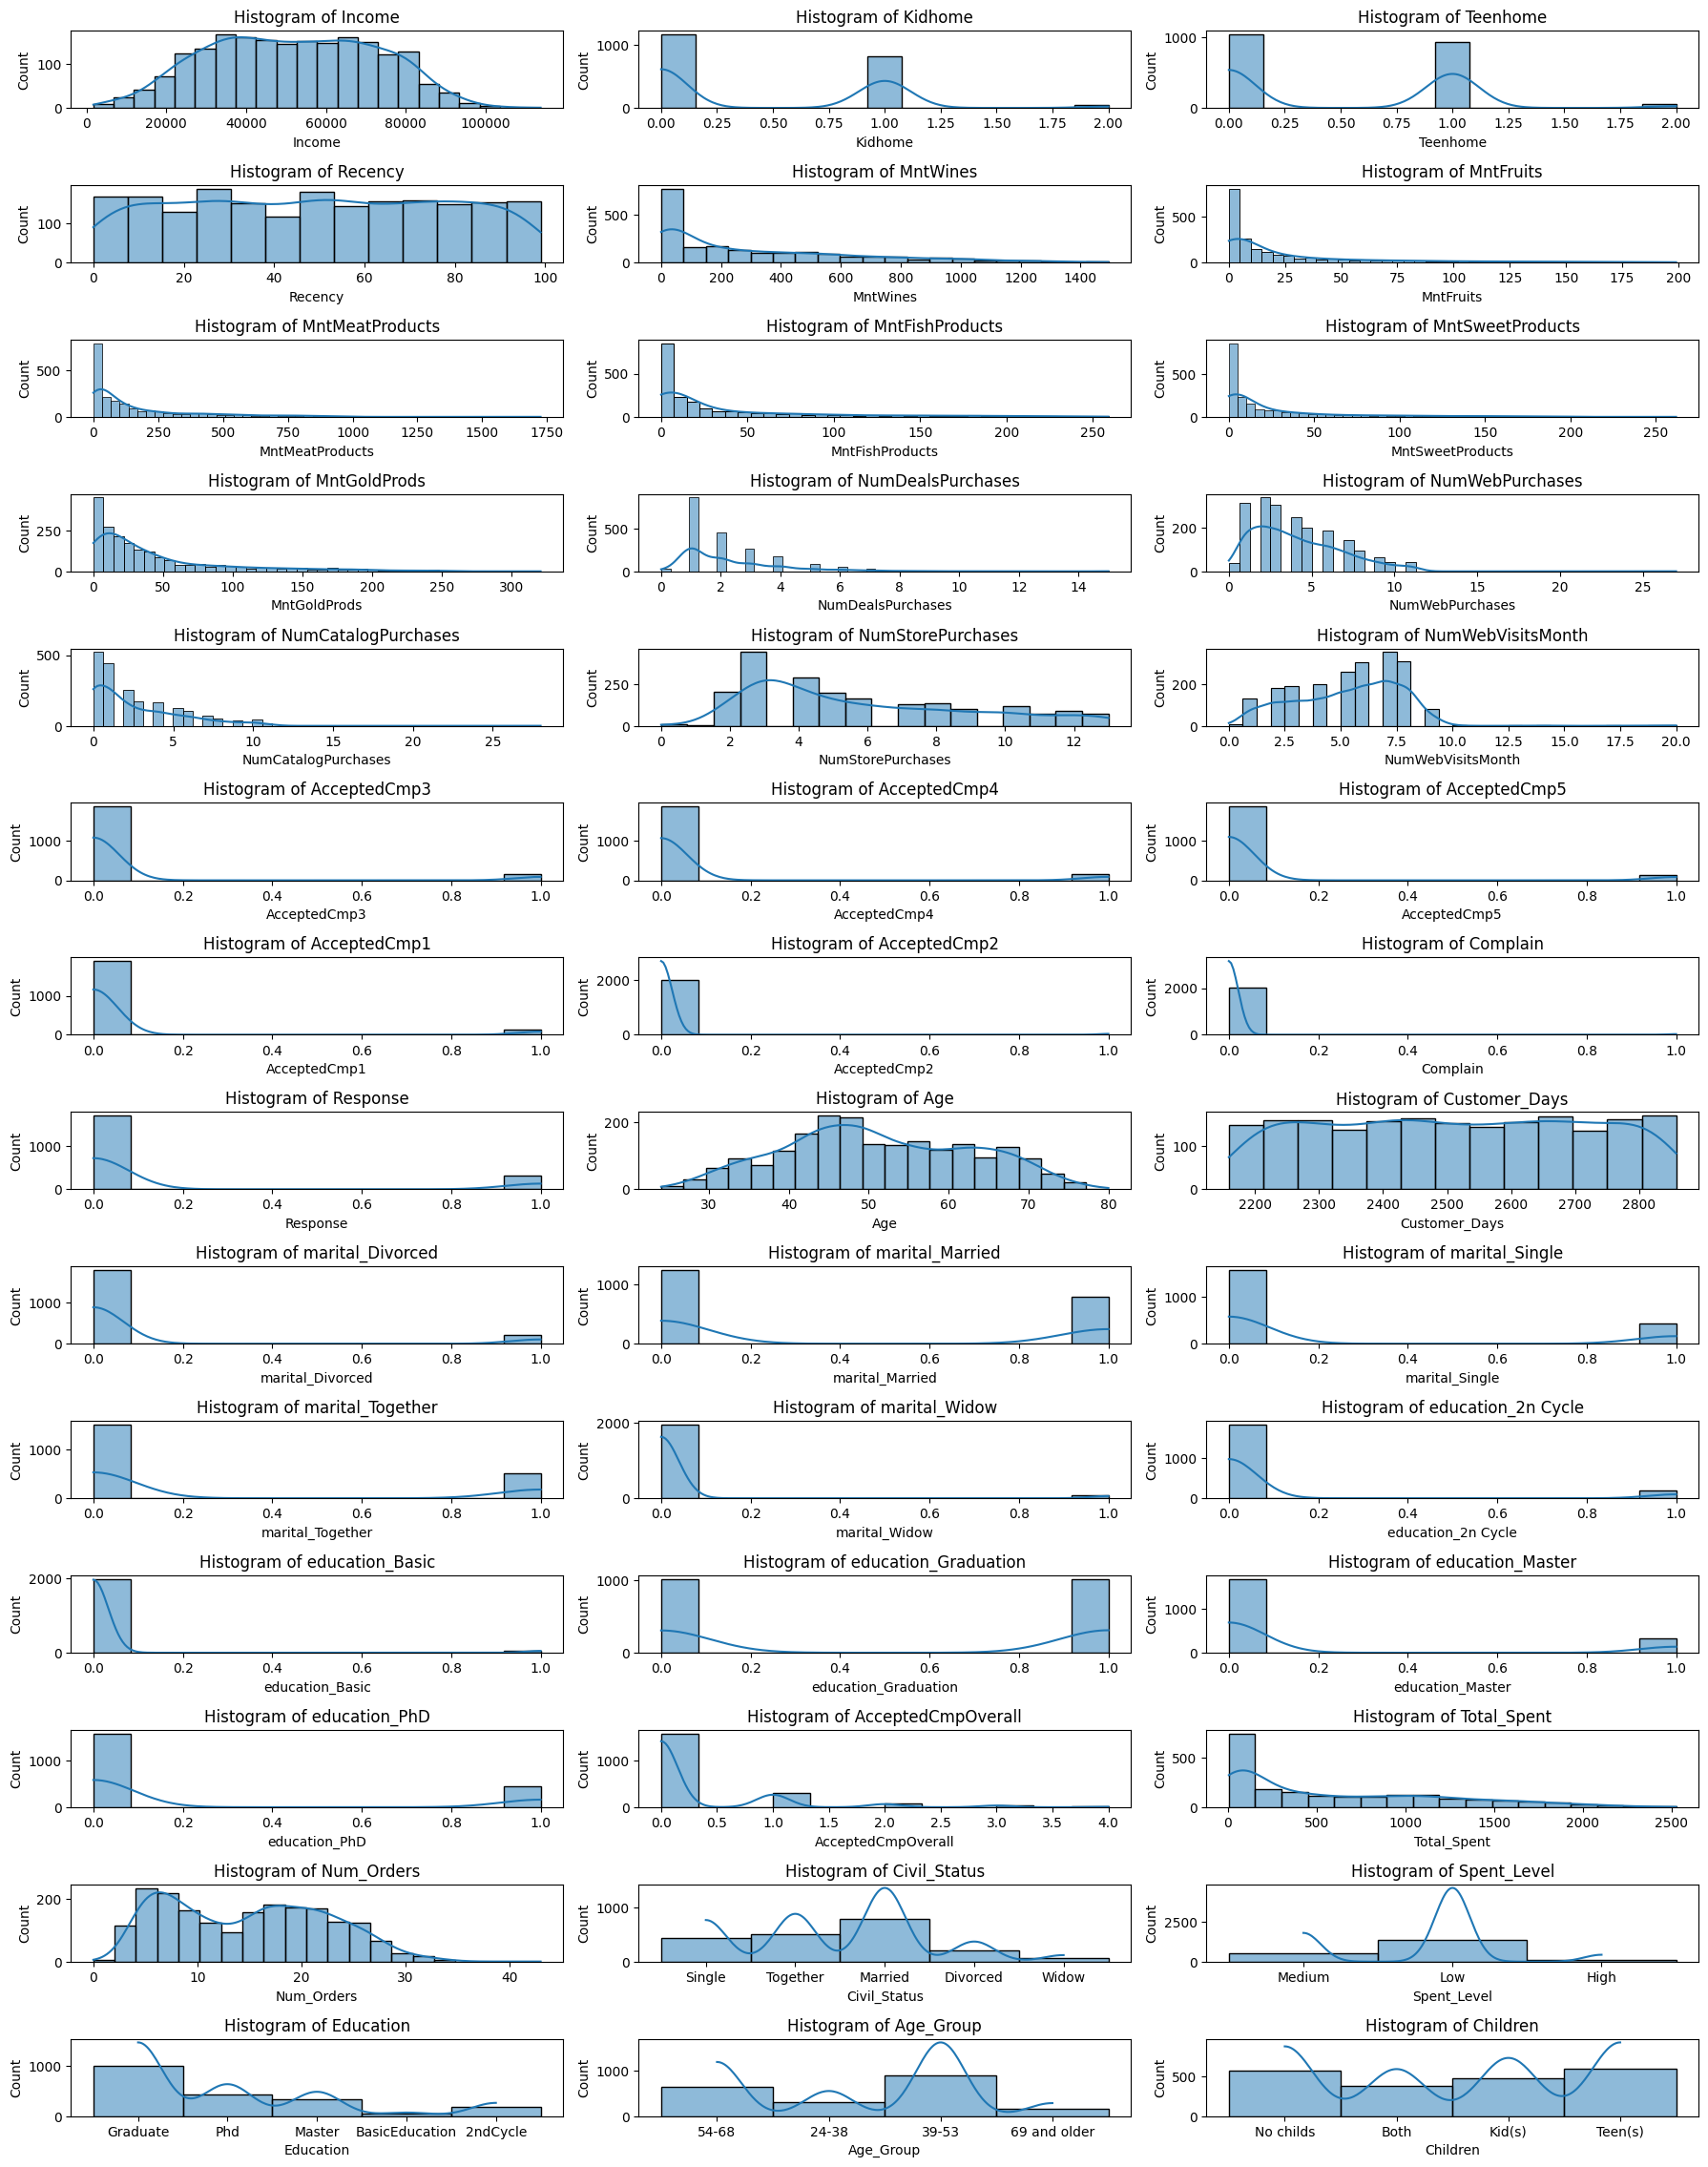

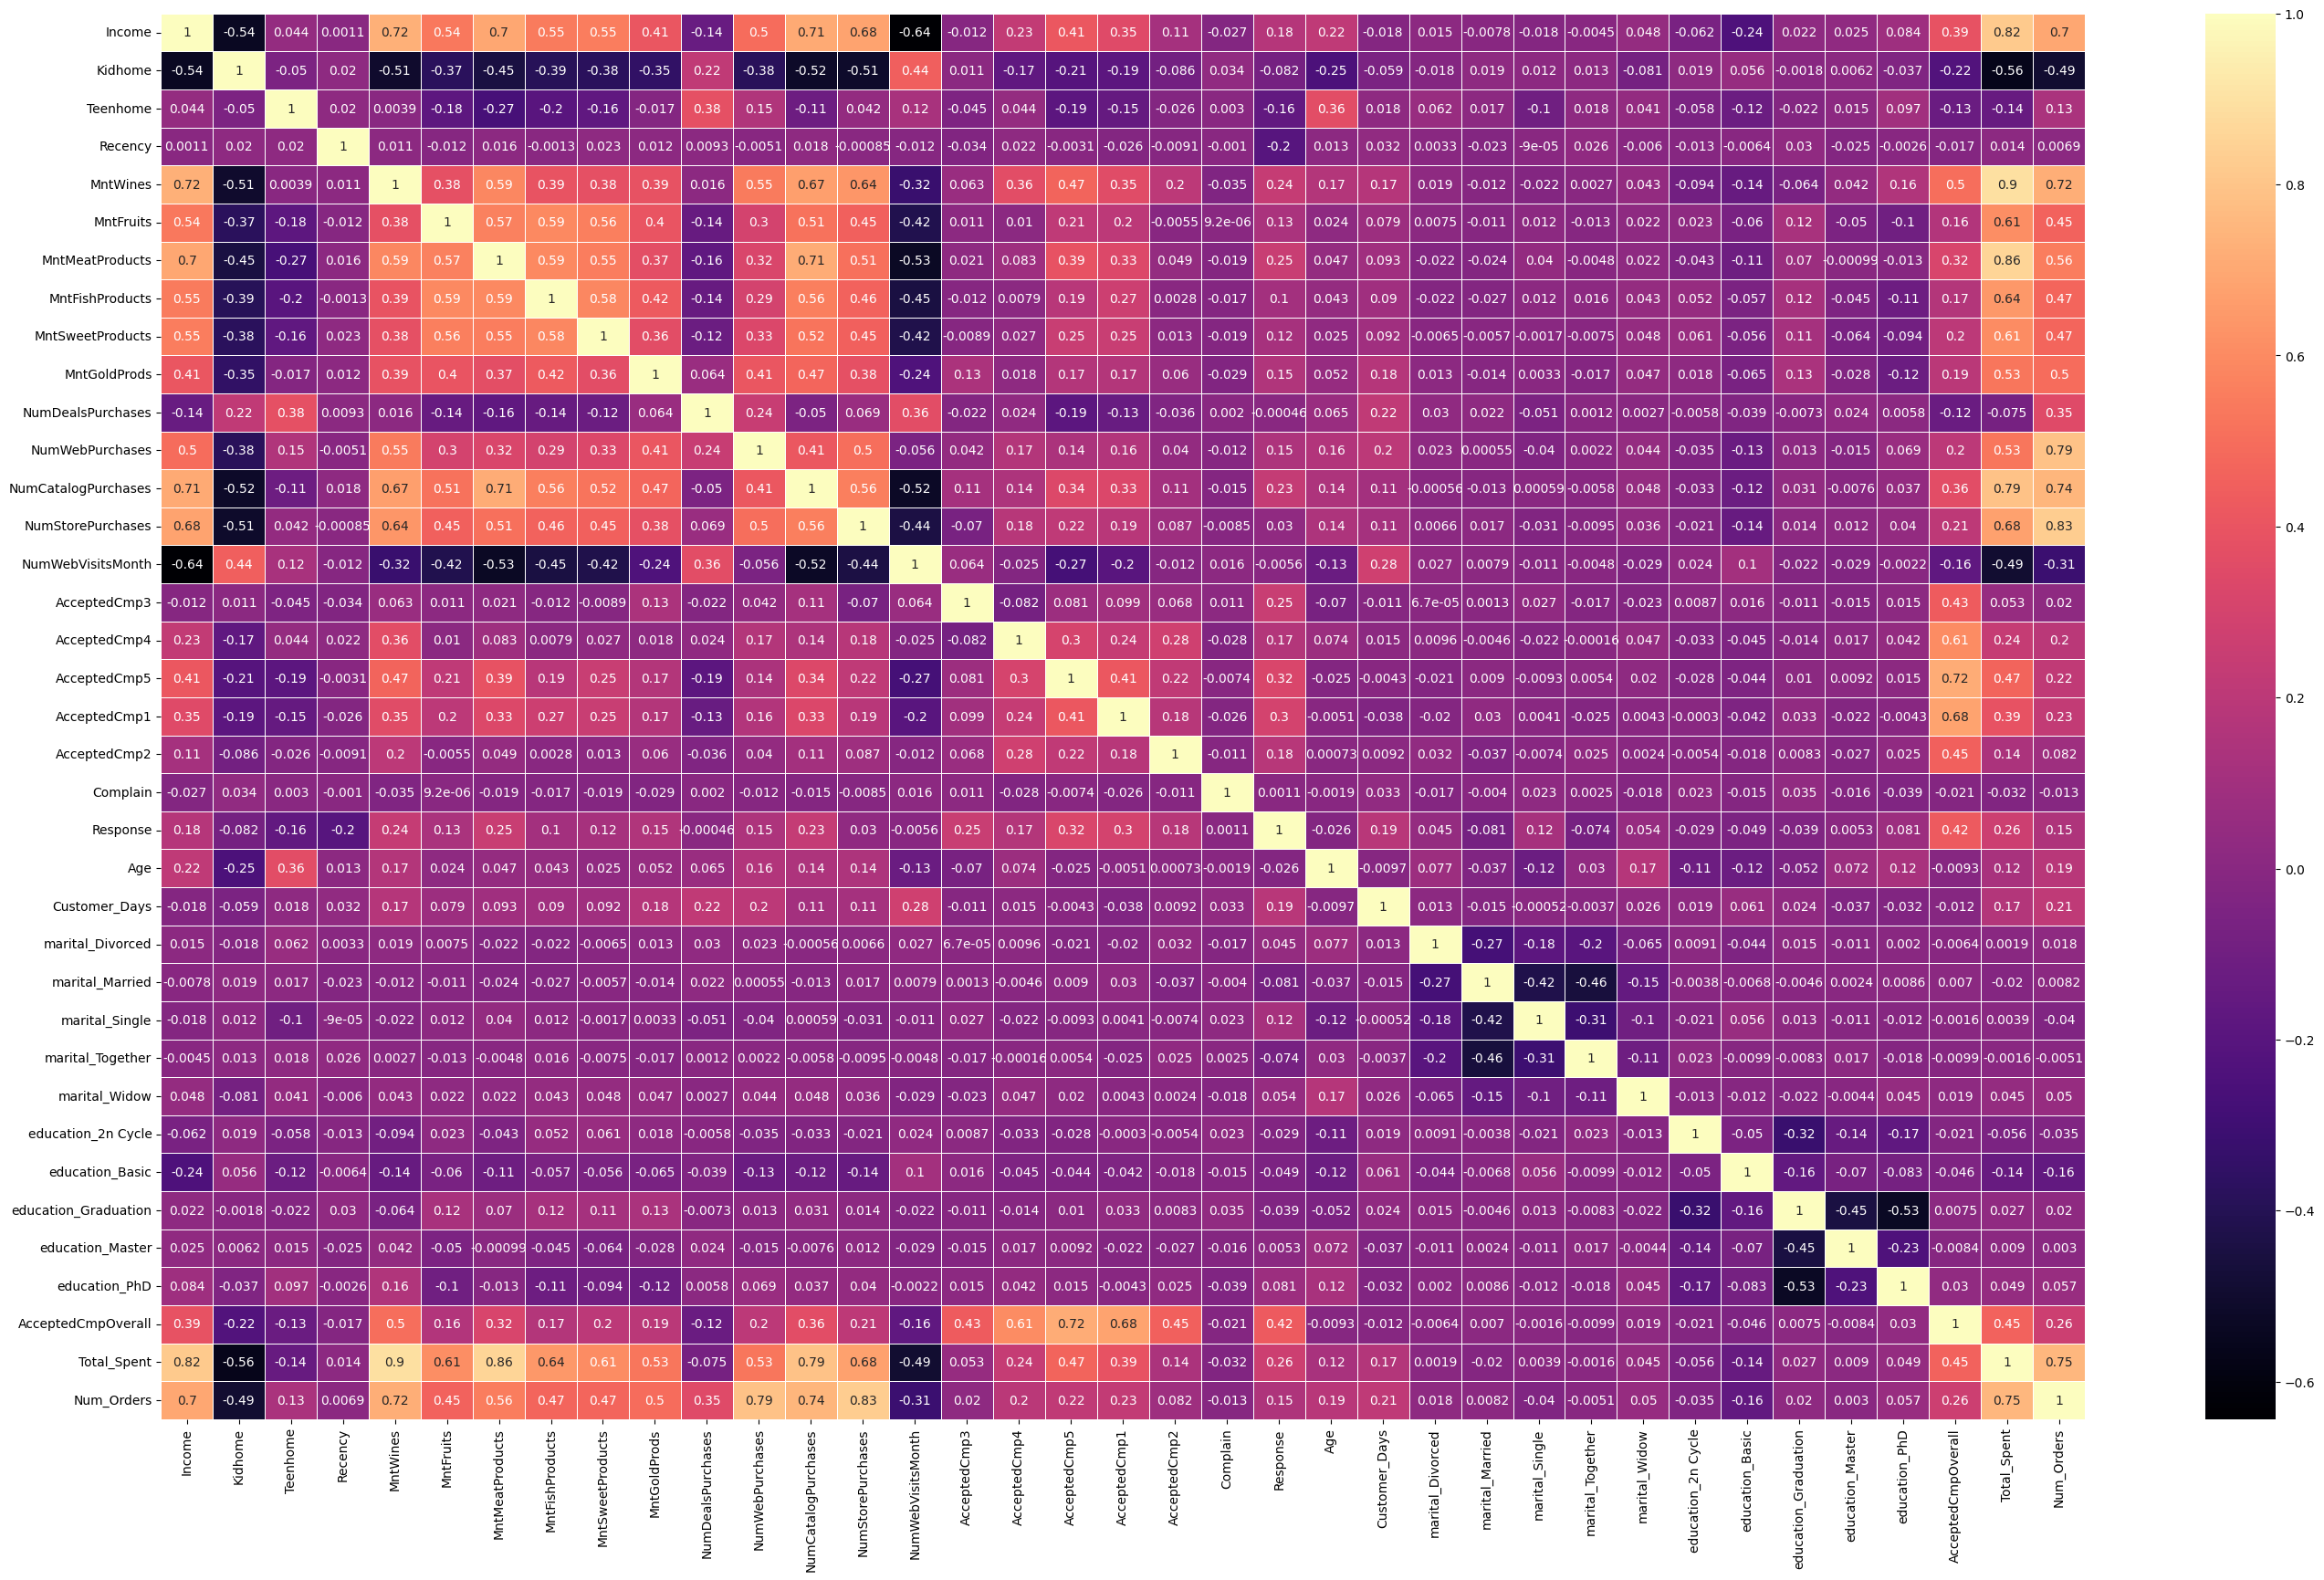

In [156]:
# Names of all the columns
col_names = [name for name in data.columns]
fig, axes = plt.subplots(len(col_names) // 3 + 1, 3, figsize=(18, 24))
axes = axes.flatten()

for i, colname in enumerate(col_names):
    sns.histplot(data[colname], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {colname}')

# Hiding missing plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlation Heatmap
numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(34, 20))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.show()

#### Purchasing Behavior by Income <a class="anchor" id="section2_1"></a>
First, we are going to make some plots, then we will explain the findings.

```python
# Lists for future use
purchases_channels = ["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
items_types = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]

# Plots
# Plot 1: Income & Total Spent
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(data=data, x="Total_Spent", y="Income",hue=data["Education"], palette='viridis')
sns.regplot(data=data, x="Total_Spent", y="Income",scatter=False, color="red")
ax.set_xlabel("Amount Spent")
ax.set_ylabel("Income in two years USD")
plt.annotate(f'Correlation: {round(data['Income'].corr(data["Total_Spent"]),2)}', xy=(1000, 20000), xytext=(1000, 20000))
plt.title("Spent Behavior by Income")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot 2: Income & Number Purchases 
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(data=data, x="Num_Orders", y="Income",hue=data["Education"], palette='viridis')
sns.regplot(data=data, x="Num_Orders", y="Income", scatter=False, color="red")
ax.set_xlabel("Number of Orders")
ax.set_ylabel("Income in two years USD")
plt.annotate(f'Correlation: {round(data['Income'].corr(data["Num_Orders"]),2)}', xy=(25, 20000), xytext=(25, 20000))
plt.title("Spent Behavior by Income")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot 3: Income & form of acquisition
plot = 0
fig = plt.figure(figsize=(8,8))
# loop through number of columns to plot
for i in range(len(purchases_channels)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of purchase type vs income with education
    sns.scatterplot(y=data["Income"], x= data[purchases_channels[i]], 
                    hue=data["Education"], palette="viridis")

    sns.regplot(y=data["Income"], x= data[purchases_channels[i]], scatter=False, color="red")
    plt.title("Spent Behavior by income")
    plt.legend()
    plt.tight_layout()
plt.show()

# Plot 4: Income & Items types

fig = plt.figure(figsize=(8,10))
plot = 0

for i in range(len(items_types)):
    plot += 1
    ax = plt.subplot(3,2,plot)
    sns.scatterplot(x=data[items_types[i]], y=data["Income"],hue=data["Education"], palette='viridis')
    sns.regplot(y=data["Income"], x= data[items_types[i]], scatter=False, color="red")
    plt.title("Spent Behavior by Income")
    plt.tight_layout()
plt.show()

# Plot 5: Income & Items types 2
fig = plt.figure(figsize=(8, 10))

for i, amount in enumerate(items_types):
    g = sns.FacetGrid(data, col="Education", col_wrap=3)
    g.map(sns.scatterplot, "Income", amount)
    g.add_legend()

plt.show()
```

**Findings:**

- Without any ounce of surprise, we found that clients with higher income tend to purchase and spend more. Also, clients with more acquisition power tend to purchase more meat, wine, and fruit products.
- We have little, almost no, information about shoppers with "Basic" education compared to other shoppers.
- In general, independent of their education level, users with higher income tend to spend more on each type of product.
- Purchases across all sales channels tend to increase along with the spike in income. On the contrary, the relationship between higher income and purchase deals has a negative correlation (though not a strong one).

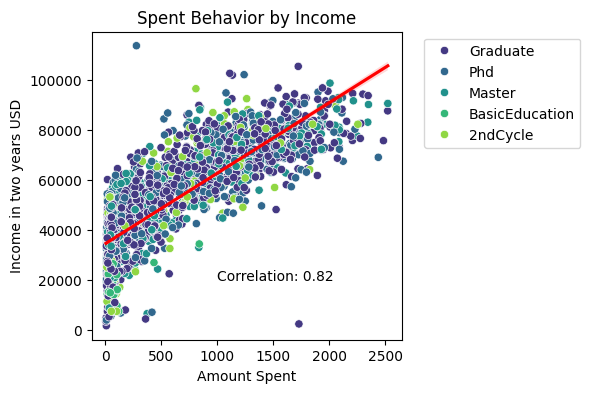

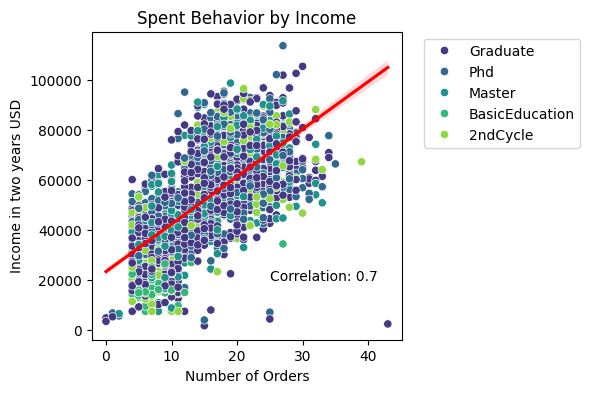

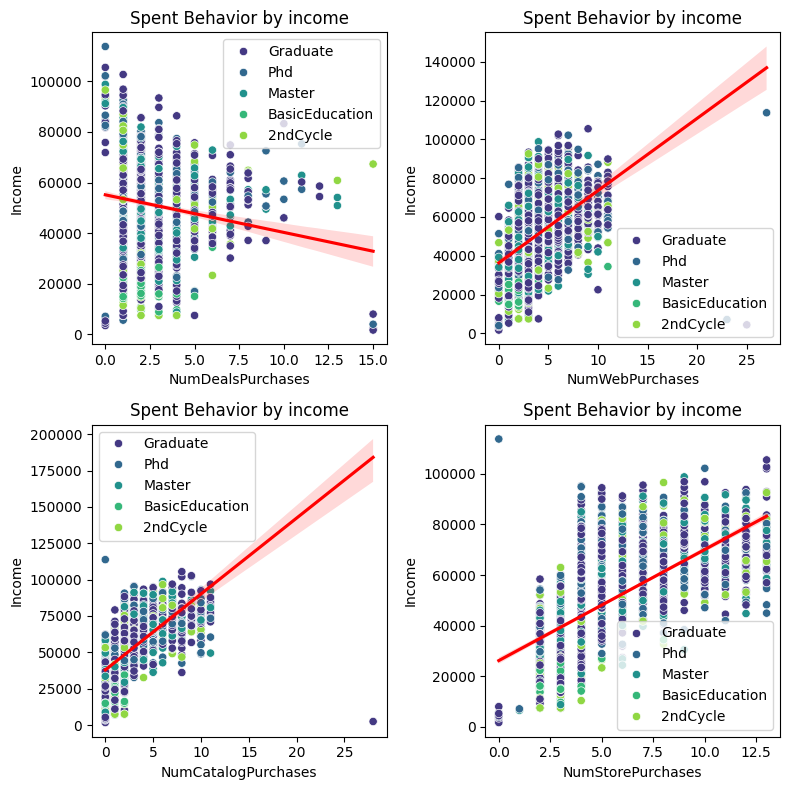

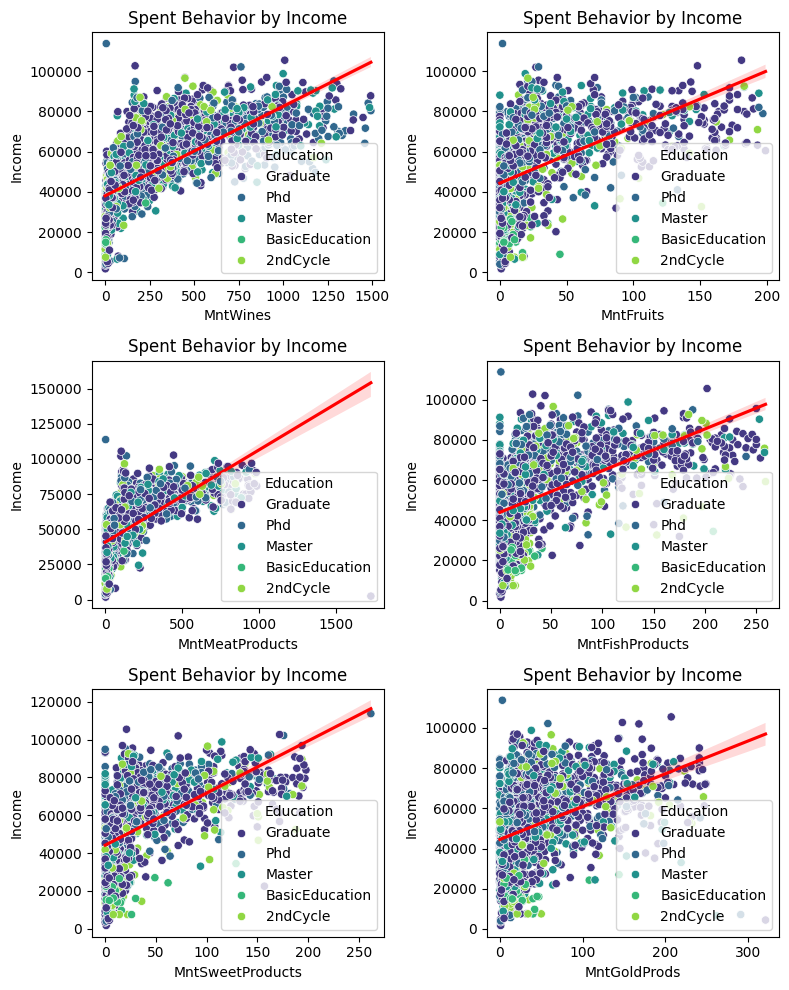

<Figure size 800x1000 with 0 Axes>

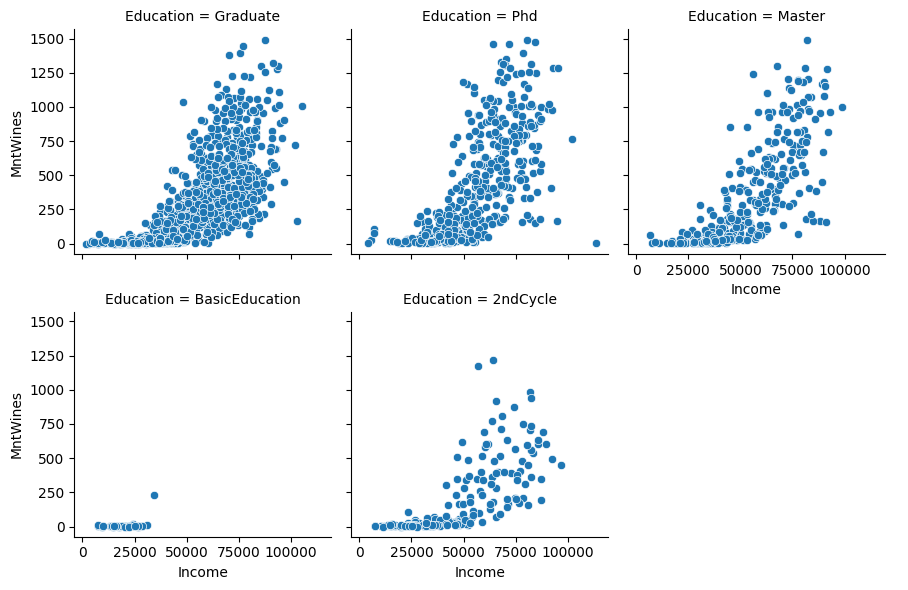

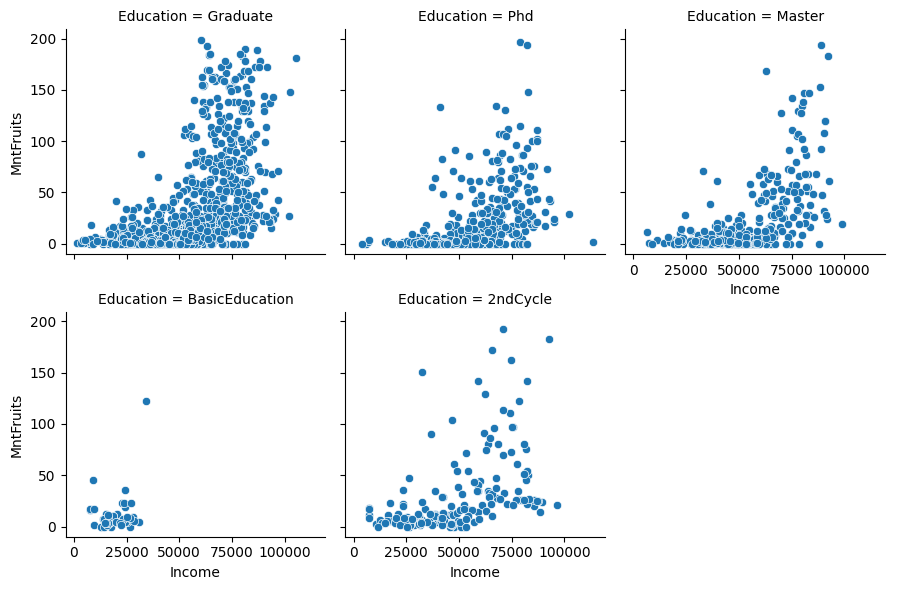

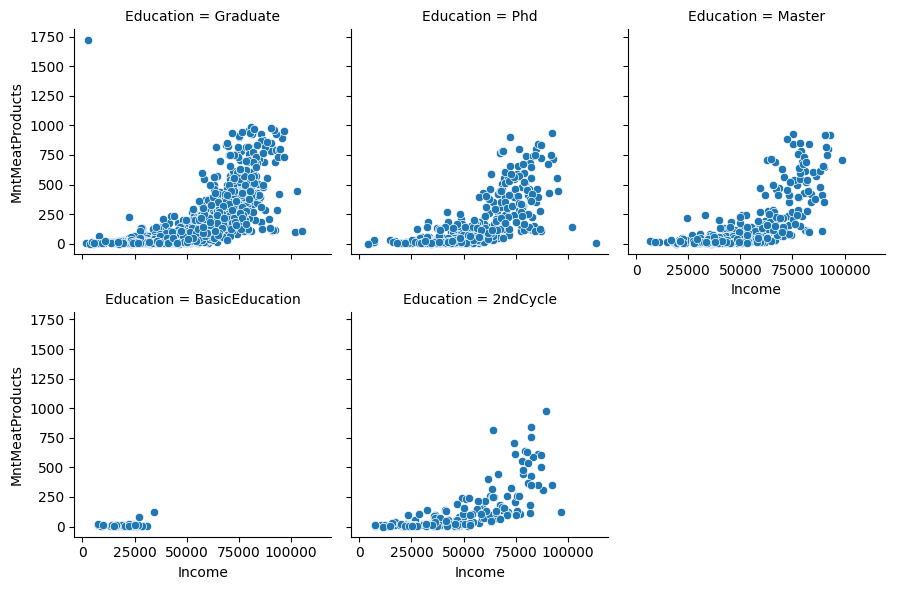

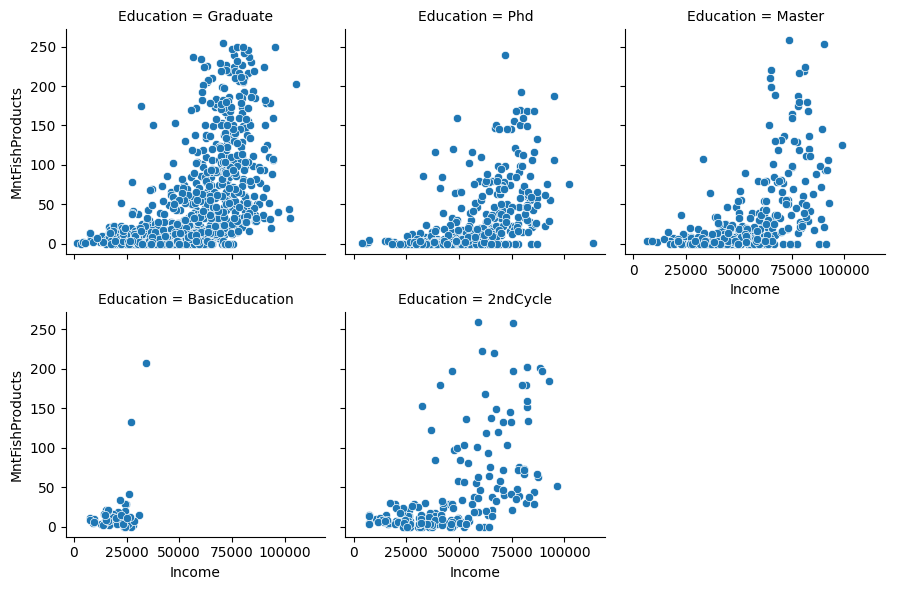

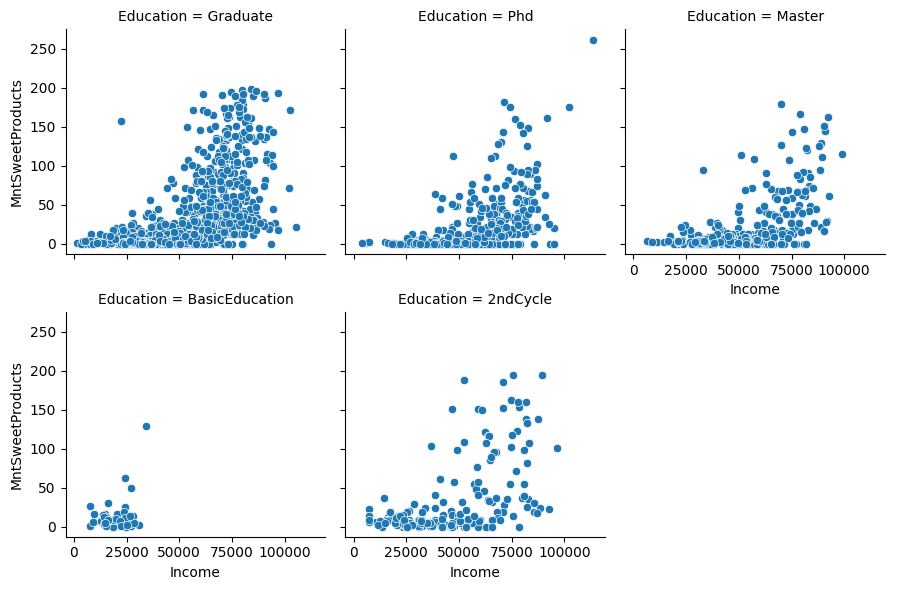

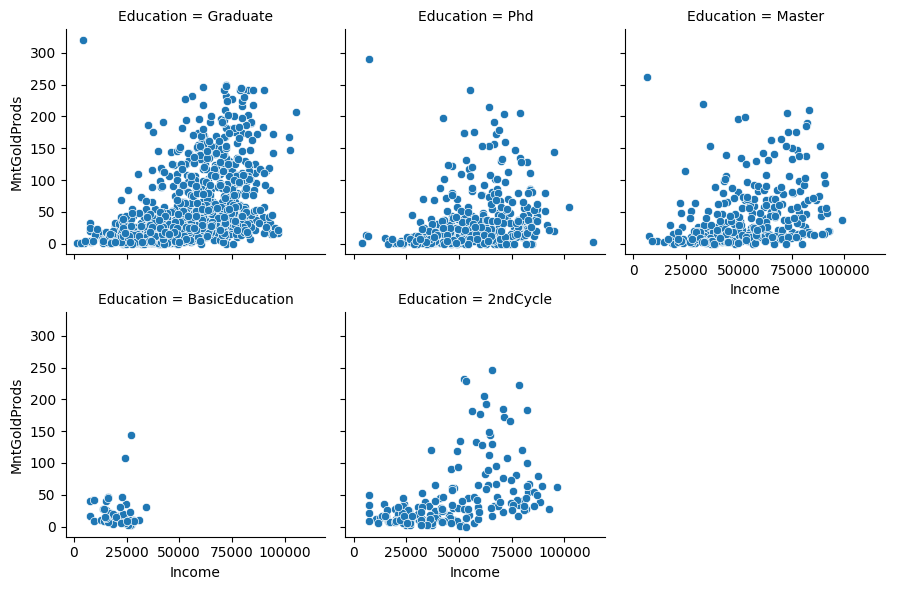

In [157]:
# Lists for future use
purchases_channels = ["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
items_types = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]

# Plots
# Plot 1: Income & Total Spent
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(data=data, x="Total_Spent", y="Income",hue=data["Education"], palette='viridis')
sns.regplot(data=data, x="Total_Spent", y="Income",scatter=False, color="red")
ax.set_xlabel("Amount Spent")
ax.set_ylabel("Income in two years USD")
plt.annotate(f'Correlation: {round(data['Income'].corr(data["Total_Spent"]),2)}', xy=(1000, 20000), xytext=(1000, 20000))
plt.title("Spent Behavior by Income")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot 2: Income & Number Purchases 
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(data=data, x="Num_Orders", y="Income",hue=data["Education"], palette='viridis')
sns.regplot(data=data, x="Num_Orders", y="Income", scatter=False, color="red")
ax.set_xlabel("Number of Orders")
ax.set_ylabel("Income in two years USD")
plt.annotate(f'Correlation: {round(data['Income'].corr(data["Num_Orders"]),2)}', xy=(25, 20000), xytext=(25, 20000))
plt.title("Spent Behavior by Income")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot 3: Income & form of acquisition

plot = 0
fig = plt.figure(figsize=(8,8))
# loop through number of columns to plot
for i in range(len(purchases_channels)):
    plot += 1
    # subplot to create grid of plots
    ax = plt.subplot(2, 2, plot)
    # scatterplot of purchase type vs income with education
    sns.scatterplot(y=data["Income"], x= data[purchases_channels[i]], 
                    hue=data["Education"], palette="viridis")

    sns.regplot(y=data["Income"], x= data[purchases_channels[i]], scatter=False, color="red")
    plt.title("Spent Behavior by income")
    plt.legend()
    plt.tight_layout()
plt.show()

# Plot 4: Income & Items types

fig = plt.figure(figsize=(8,10))
plot = 0

for i in range(len(items_types)):
    plot += 1
    ax = plt.subplot(3,2,plot)
    sns.scatterplot(x=data[items_types[i]], y=data["Income"],hue=data["Education"], palette='viridis')
    sns.regplot(y=data["Income"], x= data[items_types[i]], scatter=False, color="red")
    plt.title("Spent Behavior by Income")
    plt.tight_layout()
plt.show()

# Plot 5: Income & Items types 2
fig = plt.figure(figsize=(8, 10))

for i, amount in enumerate(items_types):
    g = sns.FacetGrid(data, col="Education", col_wrap=3)
    g.map(sns.scatterplot, "Income", amount)
    g.add_legend()

plt.show()

#### Purchasing Behavior by Age <a class="anchor" id="section2_2"></a>

As we did in the first task, we will create some plots and then explain our findings.

```python
# Plot 6: Age and Total Spent
fig = plt.figure(figsize=(7,7))
sns.scatterplot(data=data,x="Age", y="Total_Spent")
sns.regplot(data=data,x="Age", y="Total_Spent",scatter=False, color="red")
plt.title("Spent Behavior by Age")
plt.annotate(f'Correlation: {round(data['Age'].corr(data["Total_Spent"]),2)}', xy=(60, 2500), xytext=(60, 2500))
plt.show()

# Plot 7: Age and Number of Orders
fig = plt.figure(figsize=(7,7))
sns.scatterplot(data=data,x="Age", y="Num_Orders")
sns.regplot(data=data,x="Age", y="Num_Orders",scatter=False, color="red")
plt.annotate(f'Correlation: {round(data['Age'].corr(data["Num_Orders"]),2)}', xy=(60, 40), xytext=(60, 40))
plt.title("Spent Behavior by Age")
plt.show()

# Plot 8: Age and Item types
fig = plt.figure(figsize=(9,9))
plot = 1
for i in range(len(items_types)):
    ax = plt.subplot(3,2,plot)
    sns.scatterplot(data=data,x="Age", y=items_types[i])
    sns.regplot(data=data,x="Age", y=items_types[i],scatter=False, color="red")
    plt.title("Spent Behavior by Age")
    plt.tight_layout()
    plot += 1
plt.show()

# Plot 9: Age and form of acquisition
fig = plt.figure(figsize=(9,9))
plot = 1
for i in range(len(purchases_channels)):
    ax = plt.subplot(2,2,plot)
    sns.scatterplot(data=data,x="Age", y=purchases_channels[i])
    sns.regplot(data=data,x="Age", y=purchases_channels[i],scatter=False, color="red")
    plt.title("Spent Behavior by Age")
    plt.tight_layout()
    plot += 1
plt.show()

# Plot 10: Customers by Age Group
fig = plt.figure(figsize=(7,7))
sns.countplot(data=data, x=data["Age_Group"], order=["24-38", "39-53", "54-68", "69 and older"], hue="Spent_Level", palette='viridis')
plt.title("Spent Behavior by Age")
plt.ylabel("Number of users")
plt.show()

# Plot 11: Average Spent by Age Group
fig = plt.figure(figsize=(7,7))
plot = data.groupby("Age_Group").Total_Spent.mean().reset_index(name="spent_avg")
sns.barplot(data=plot, x="Age_Group", y= "spent_avg", palette='viridis')
plt.title("Spent Behavior by Age")
plt.show()

# Plot 12: Age and Type products
Ageplot = data.groupby("Age_Group")[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]].sum().reset_index()
fig = plt.figure(figsize=(8,8))
Ageplot.plot(x='Age_Group', y=items_types, kind='bar',  width=0.8, edgecolor='#131313')
plt.title("Spent Behavior by Age")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

# Plot 13: Age Group and Total Spent
sns.boxplot(data=data, y="Total_Spent", x="Age_Group", palette="viridis")
plt.title("Spent Behavior by Family")
plt.tight_layout()
plt.show()

# Plot 14: Age Group and Products 
fig = plt.figure(figsize=(7,7))
plot = 1
for i in range(len(items_types)):
    plt.subplot(3,2,plot)
    sns.boxplot(data=data, x="Age_Group", y=items_types[i],palette="viridis")
    plot += 1
    plt.title("Spent Behavior by Family")
    plt.tight_layout()
plt.show()

# Plot 15: Age Group and form of acquisition
fig = plt.figure(figsize=(7,7))
plot = 1
for i in range(len(purchases_channels)):
    plt.subplot(2,2,plot)
    sns.boxplot(data=data, x="Age_Group", y=purchases_channels[i],palette="viridis")
    plot += 1
    plt.title("Spent Behavior by Family")
    plt.tight_layout()
plt.show()
```

**Findings:**

- Using the Age column is not the most effective way to analyze the data because this variable didn’t have a correlation with other variables like Total Spent, Number of Orders,    etc. So we switched to another form of analysis, using the Age Group column.
- The next groups, 39-53 and 54-68, are our principal clients, especially the first one. However, the highest average ticket is from the “69 and older” group.
- All of the groups tend to spend more on wine products. On the other hand, the least purchased type is the fruit products.
- The youngest and oldest groups are the least affected by deals.
- The 69 and older group, on average, tends to shop the most online, in the store, and through the catalog. Similar situation happens with the “53-68” group.

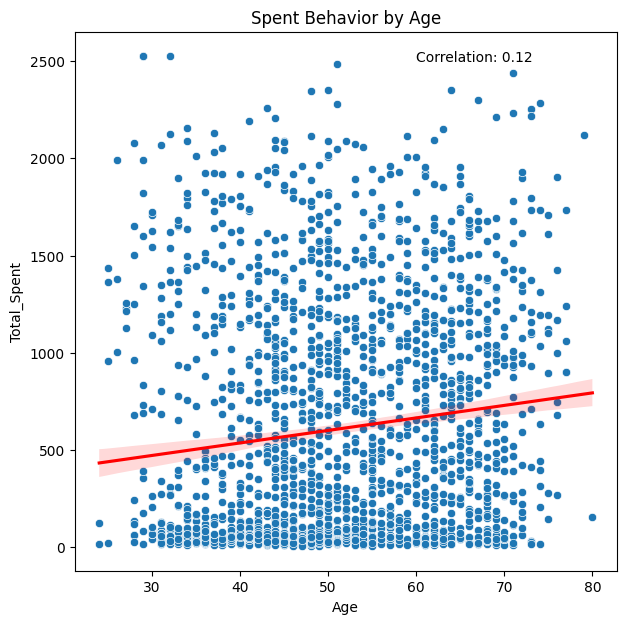

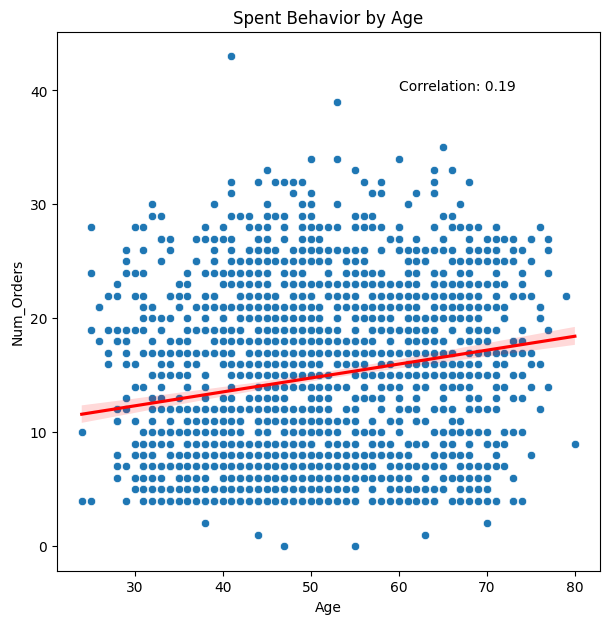

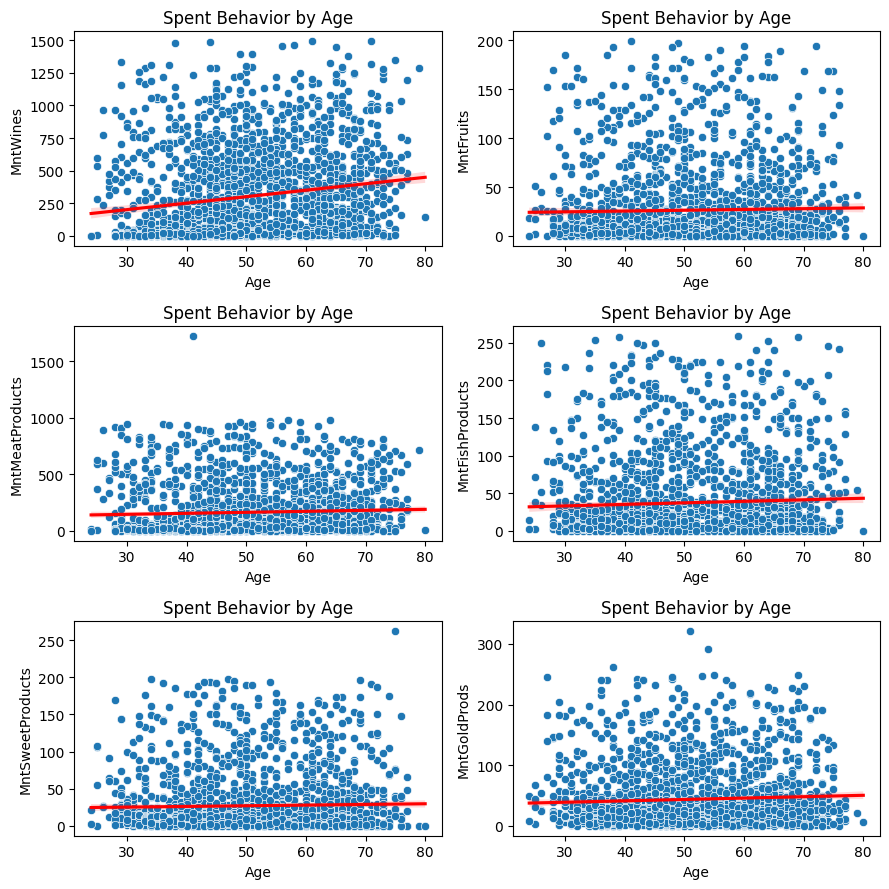

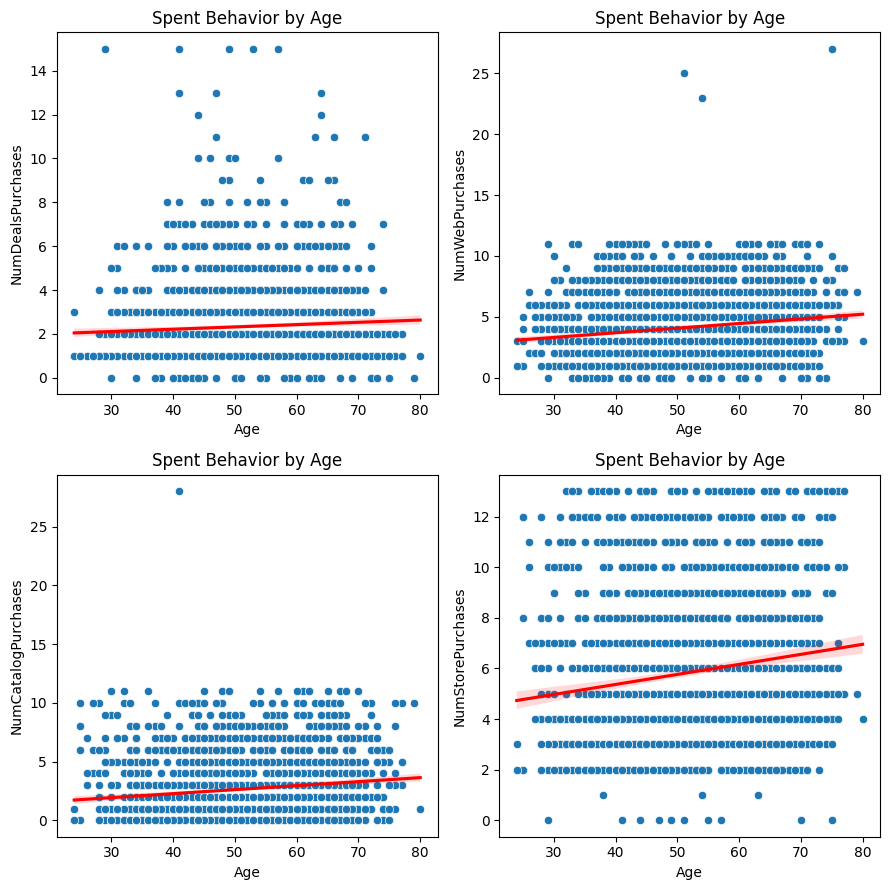

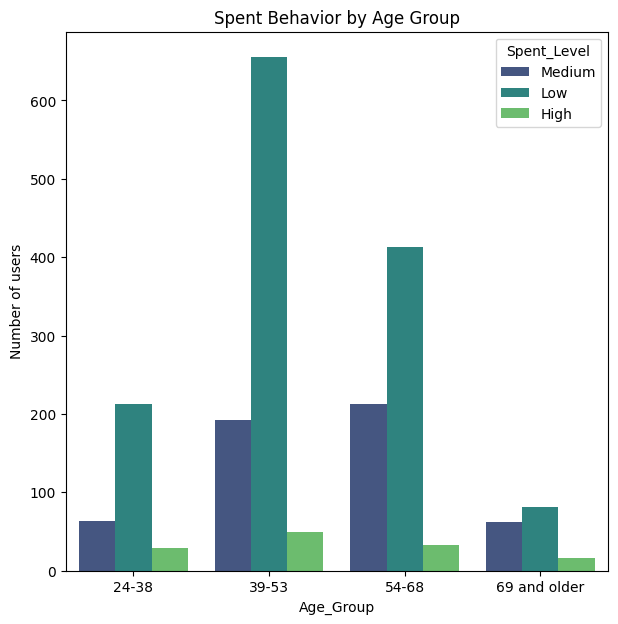

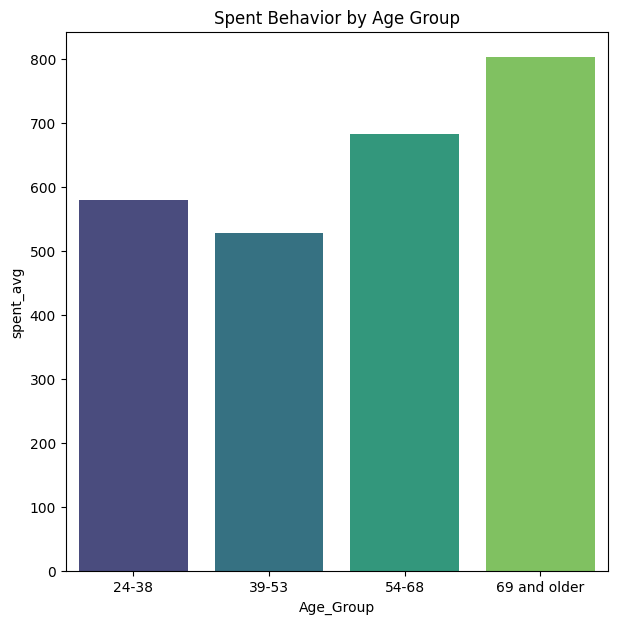

<Figure size 800x800 with 0 Axes>

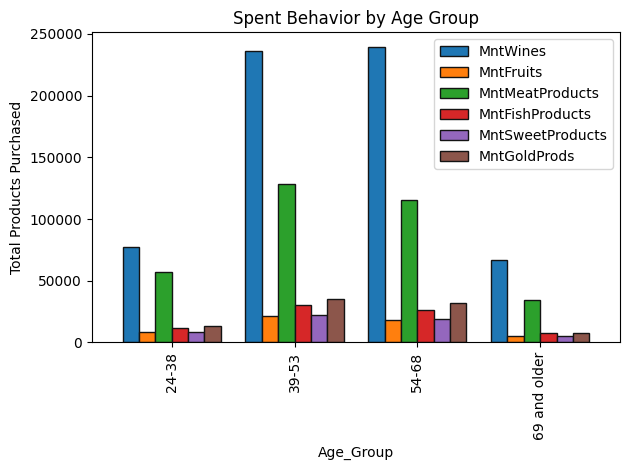

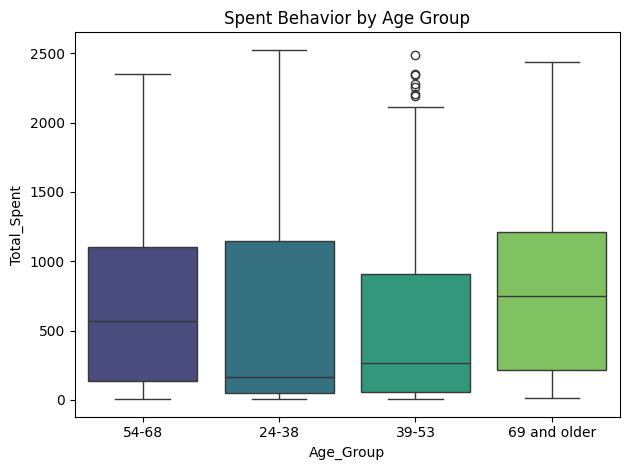

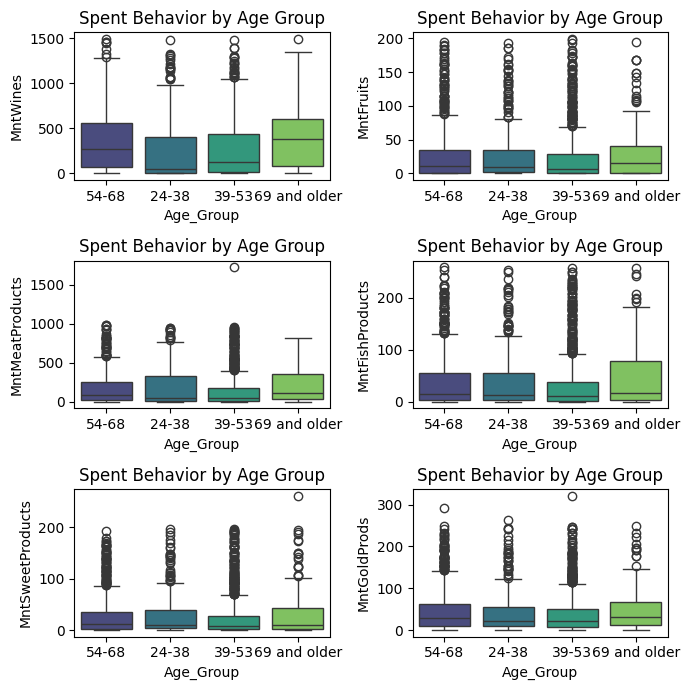

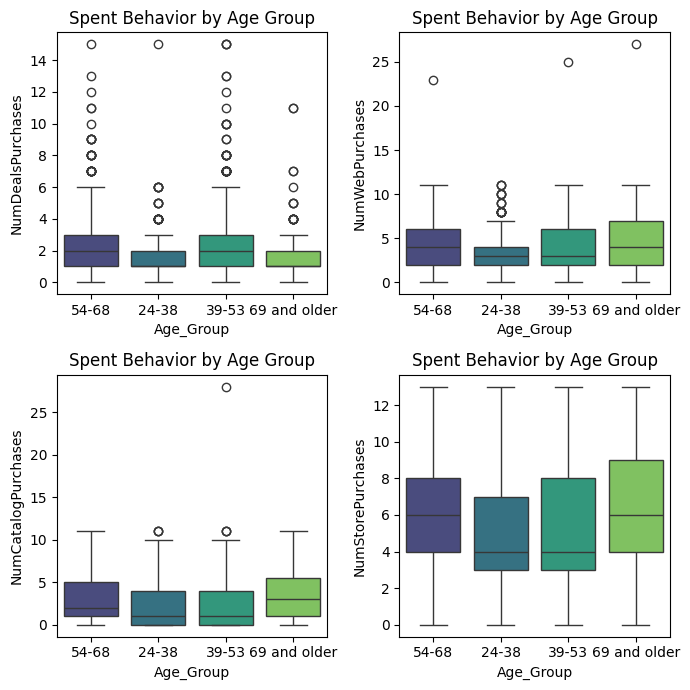

In [158]:
# Plot 6: Age and Total Spent
fig = plt.figure(figsize=(7,7))
sns.scatterplot(data=data,x="Age", y="Total_Spent")
sns.regplot(data=data,x="Age", y="Total_Spent",scatter=False, color="red")
plt.title("Spent Behavior by Age")
plt.annotate(f'Correlation: {round(data['Age'].corr(data["Total_Spent"]),2)}', xy=(60, 2500), xytext=(60, 2500))
plt.show()

# Plot 7: Age and Number of Orders
fig = plt.figure(figsize=(7,7))
sns.scatterplot(data=data,x="Age", y="Num_Orders")
sns.regplot(data=data,x="Age", y="Num_Orders",scatter=False, color="red")
plt.annotate(f'Correlation: {round(data['Age'].corr(data["Num_Orders"]),2)}', xy=(60, 40), xytext=(60, 40))
plt.title("Spent Behavior by Age")
plt.show()

# Plot 8: Age and Item types
fig = plt.figure(figsize=(9,9))
plot = 1
for i in range(len(items_types)):
    ax = plt.subplot(3,2,plot)
    sns.scatterplot(data=data,x="Age", y=items_types[i])
    sns.regplot(data=data,x="Age", y=items_types[i],scatter=False, color="red")
    plt.title("Spent Behavior by Age")
    plt.tight_layout()
    plot += 1
plt.show()

# Plot 9: Age and form of acquisition
fig = plt.figure(figsize=(9,9))
plot = 1
for i in range(len(purchases_channels)):
    ax = plt.subplot(2,2,plot)
    sns.scatterplot(data=data,x="Age", y=purchases_channels[i])
    sns.regplot(data=data,x="Age", y=purchases_channels[i],scatter=False, color="red")
    plt.title("Spent Behavior by Age")
    plt.tight_layout()
    plot += 1
plt.show()

# Plot 10: Customers by Age Group
fig = plt.figure(figsize=(7,7))
sns.countplot(data=data, x=data["Age_Group"], order=["24-38", "39-53", "54-68", "69 and older"], hue="Spent_Level", palette='viridis')
plt.title("Spent Behavior by Age Group")
plt.ylabel("Number of users")
plt.show()

# Plot 11: Average Spent by Age Group
fig = plt.figure(figsize=(7,7))
plot = data.groupby("Age_Group").Total_Spent.mean().reset_index(name="spent_avg")
sns.barplot(data=plot, x="Age_Group", y= "spent_avg", palette='viridis')
plt.title("Spent Behavior by Age Group")
plt.show()

# Plot 12: Age and Type products
Ageplot = data.groupby("Age_Group")[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]].sum().reset_index()
fig = plt.figure(figsize=(8,8))
Ageplot.plot(x='Age_Group', y=items_types, kind='bar',  width=0.8, edgecolor='#131313')
plt.title("Spent Behavior by Age Group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

# Plot 13: Age Group and Total Spent
sns.boxplot(data=data, y="Total_Spent", x="Age_Group", palette="viridis")
plt.title("Spent Behavior by Age Group")
plt.tight_layout()
plt.show()

# Plot 14: Age Group and Products 
fig = plt.figure(figsize=(7,7))
plot = 1
for i in range(len(items_types)):
    plt.subplot(3,2,plot)
    sns.boxplot(data=data, x="Age_Group", y=items_types[i],palette="viridis")
    plot += 1
    plt.title("Spent Behavior by Age Group")
    plt.tight_layout()
plt.show()

# Plot 15: Age Group and form of acquisition
fig = plt.figure(figsize=(7,7))
plot = 1
for i in range(len(purchases_channels)):
    plt.subplot(2,2,plot)
    sns.boxplot(data=data, x="Age_Group", y=purchases_channels[i],palette="viridis")
    plot += 1
    plt.title("Spent Behavior by Age Group")
    plt.tight_layout()
plt.show()





#### Purchasing Behavior by Civil Status: <a class="anchor" id="section3_2"></a>
As we did before, we will create some plots and then explain our findings.

```python
# Plot 16: Civil Status and Total Spent
civil_status_list = ["marital_Divorced","marital_Married","marital_Single","marital_Together","marital_Widow"]
items_types = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
fig = plt.figure(figsize=(8,8))
plot = 1
for i in range(len(civil_status_list)):
    plt.subplot(3,2,plot)    
    sns.scatterplot(data=data,x=civil_status_list[i], y="Total_Spent")
    sns.regplot(data=data,x=civil_status_list[i], y="Total_Spent",scatter=False, color="red")
    plot += 1
    plt.title("Spent Behavior by Civil Status")
    plt.tight_layout()
plt.show()

# Plot 17: Civil Status and Num Orders
fig = plt.figure(figsize=(8,8))
plot = 1
for i in range(len(civil_status_list)):
    plt.subplot(3,2,plot)    
    sns.scatterplot(data=data,x=civil_status_list[i], y="Num_Orders")
    sns.regplot(data=data,x=civil_status_list[i], y="Num_Orders",scatter=False, color="red")
    plot += 1
    plt.title("Spent Behavior by Civil Status")
    plt.tight_layout()
plt.show()



# Plot 18: Civil Status and Items / method acquisition
fig, axes = plt.subplots(len(purchases_channels), len(civil_status_list), figsize=(20, 20))
fig.tight_layout(pad=5.0)
for i, item in enumerate(purchases_channels):
    for j, status in enumerate(civil_status_list):
        sns.scatterplot(data=data, y=item, x=status, ax=axes[i, j])
        axes[i, j].set_title(f'{item} vs {status}')
plt.show()

fig, axes = plt.subplots(len(items_types), len(civil_status_list), figsize=(20, 20))
fig.tight_layout(pad=5.0)

for i, item in enumerate(items_types):
    for j, status in enumerate(civil_status_list):
        sns.scatterplot(data=data, y=item, x=status, ax=axes[i, j])
        axes[i, j].set_title(f'{item} vs {status}')
plt.show()

# Plot 19: Customers by Civil Status
fig = plt.figure(figsize=(7,7))
sns.countplot(data=data, x=data["Civil_Status"], hue="Spent_Level", palette='viridis')
plt.title("Spent Behavior by Civil Status")
plt.ylabel("Number of users")
plt.show()

# Plot 20: Average Spent by Civil Status
fig = plt.figure(figsize=(7,7))
plot = data.groupby("Civil_Status").Total_Spent.mean().sort_values(ascending=False).reset_index(name="spent_avg")
sns.barplot(data=plot, x="Civil_Status", y= "spent_avg", palette='viridis')
plt.title("Spent Behavior by Civil Status")
plt.show()

# Plot 21: Civil Status and most purchased type products
Ageplot = data.groupby("Civil_Status")[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]].sum().reset_index()
fig = plt.figure(figsize=(8,8))
Ageplot.plot(x='Civil_Status', y=items_types, kind='bar',  width=0.8, edgecolor='#131313')
plt.title("Spent Behavior by Civil Status")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

# Plot 22: Spent by Civil Status 2
sns.boxplot(data=data, y="Total_Spent", x="Civil_Status", palette="viridis")
plt.title("Spent Behavior by Civil Status")
plt.tight_layout()
plt.show()

# Plot 23: Civil Status and Products 
fig = plt.figure(figsize=(9,9))
plot = 1
for i in range(len(items_types)):
    plt.subplot(3,2,plot)
    sns.boxplot(data=data, x="Civil_Status", y=items_types[i],palette="viridis")
    plot += 1
    plt.title("Spent Behavior by Civil Status")
    plt.tight_layout()
plt.show()

# Plot 24: Civil Status and form of acquisition
fig = plt.figure(figsize=(9,9))
plot = 1
for i in range(len(purchases_channels)):
    plt.subplot(2,2,plot)
    sns.boxplot(data=data, x="Civil_Status", y=purchases_channels[i],palette="viridis")
    plot += 1
    plt.title("Spent Behavior by Civil Status")
    plt.tight_layout()
plt.show()
```

**Findings:** 
- Like the last time, using the columns related to civil status like `marital_Divorced` or `marital_Married` didn’t give us any significant insights. Instead, we are going to use the column Civil_Status.
- The biggest clients are married, and the smallest are widows. However, this last group has the highest average ticket (especially in wine products).
- As with `age`, wine is the most purchased product and fruit is the least.
- Widows, on average, tend to shop in store, online, and through the catalog.
- It seems like before, deals have little effect on these groups.

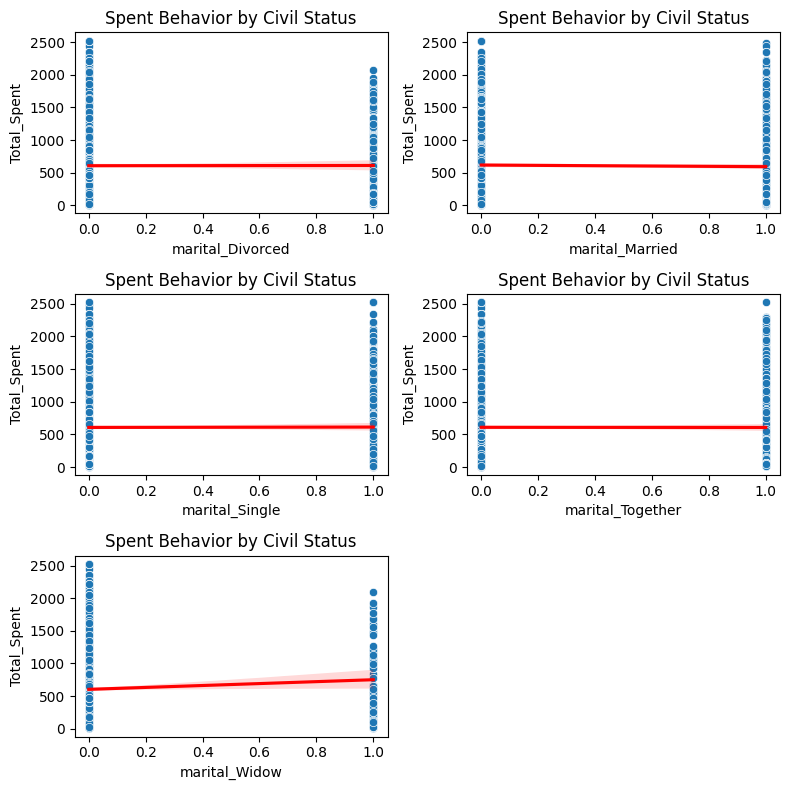

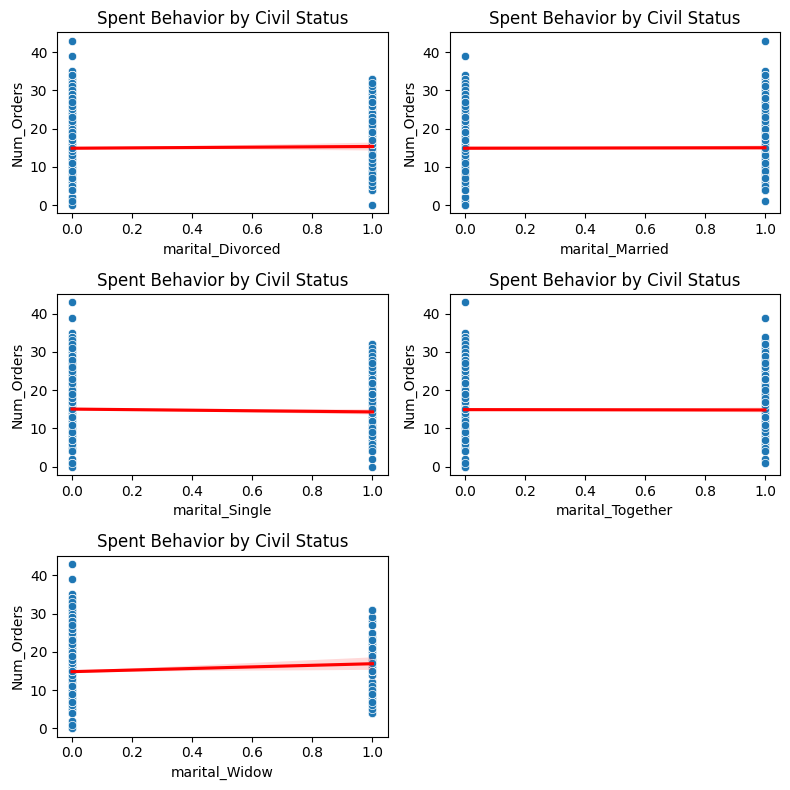

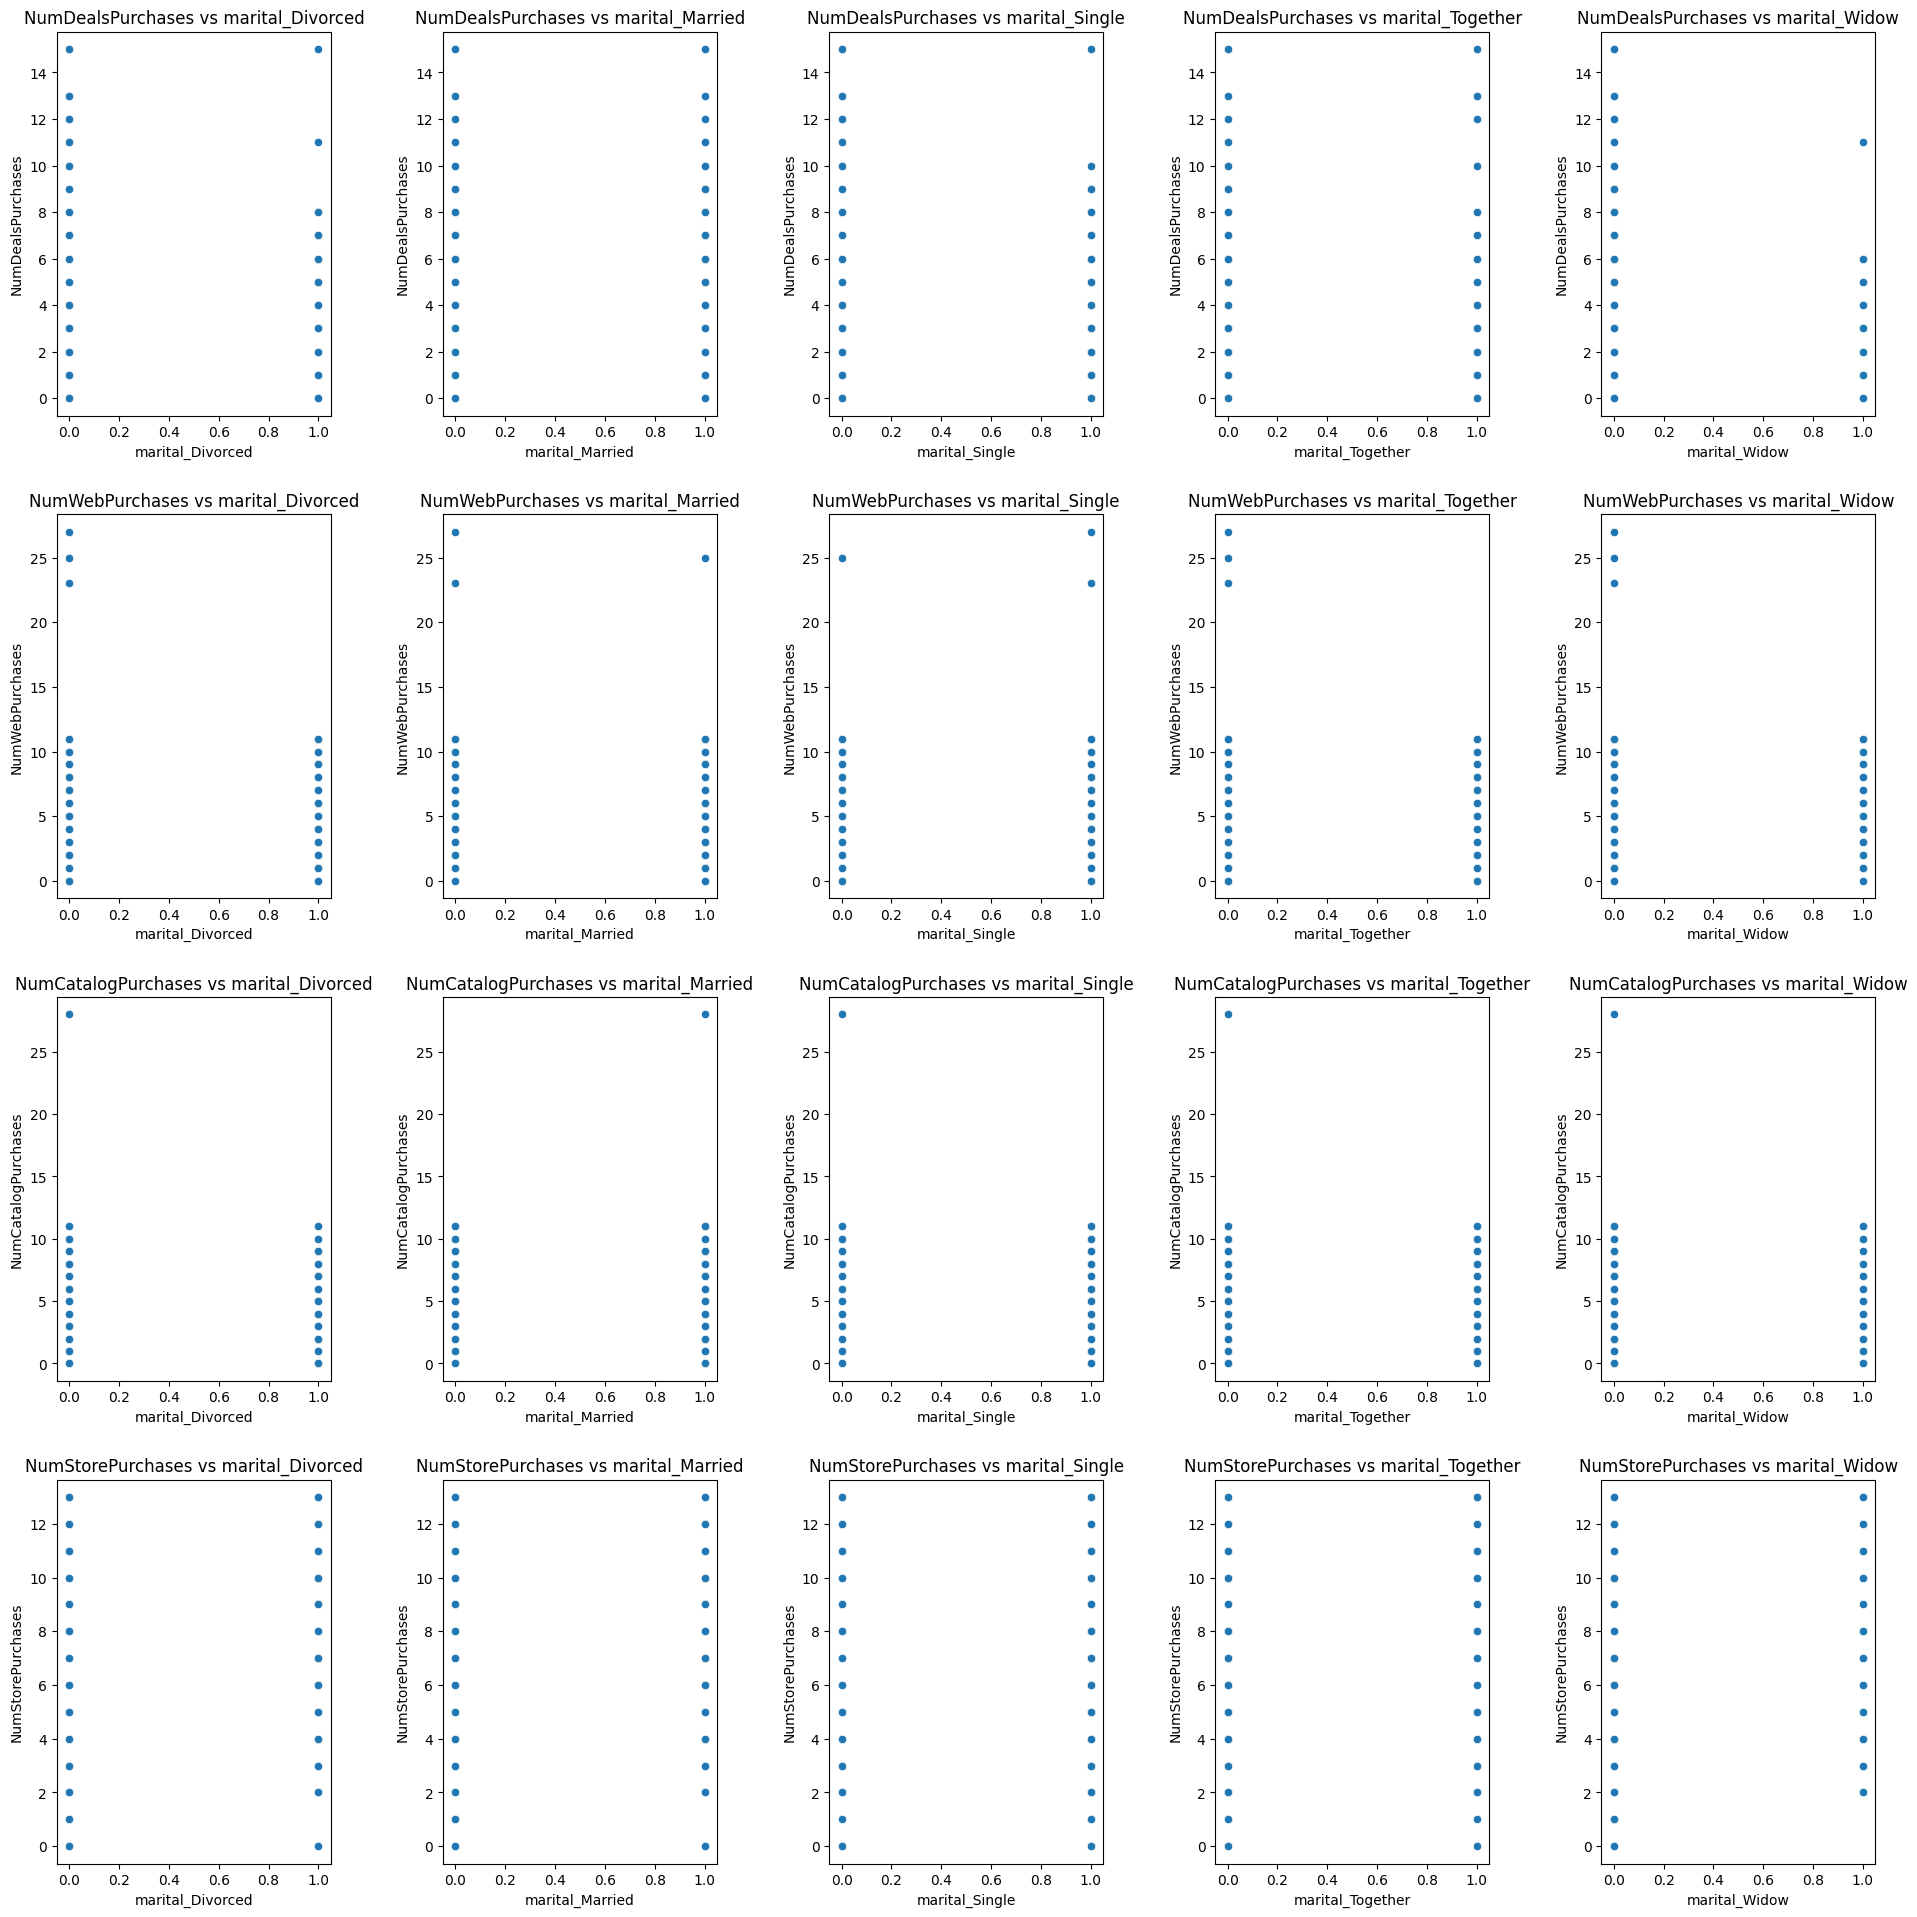

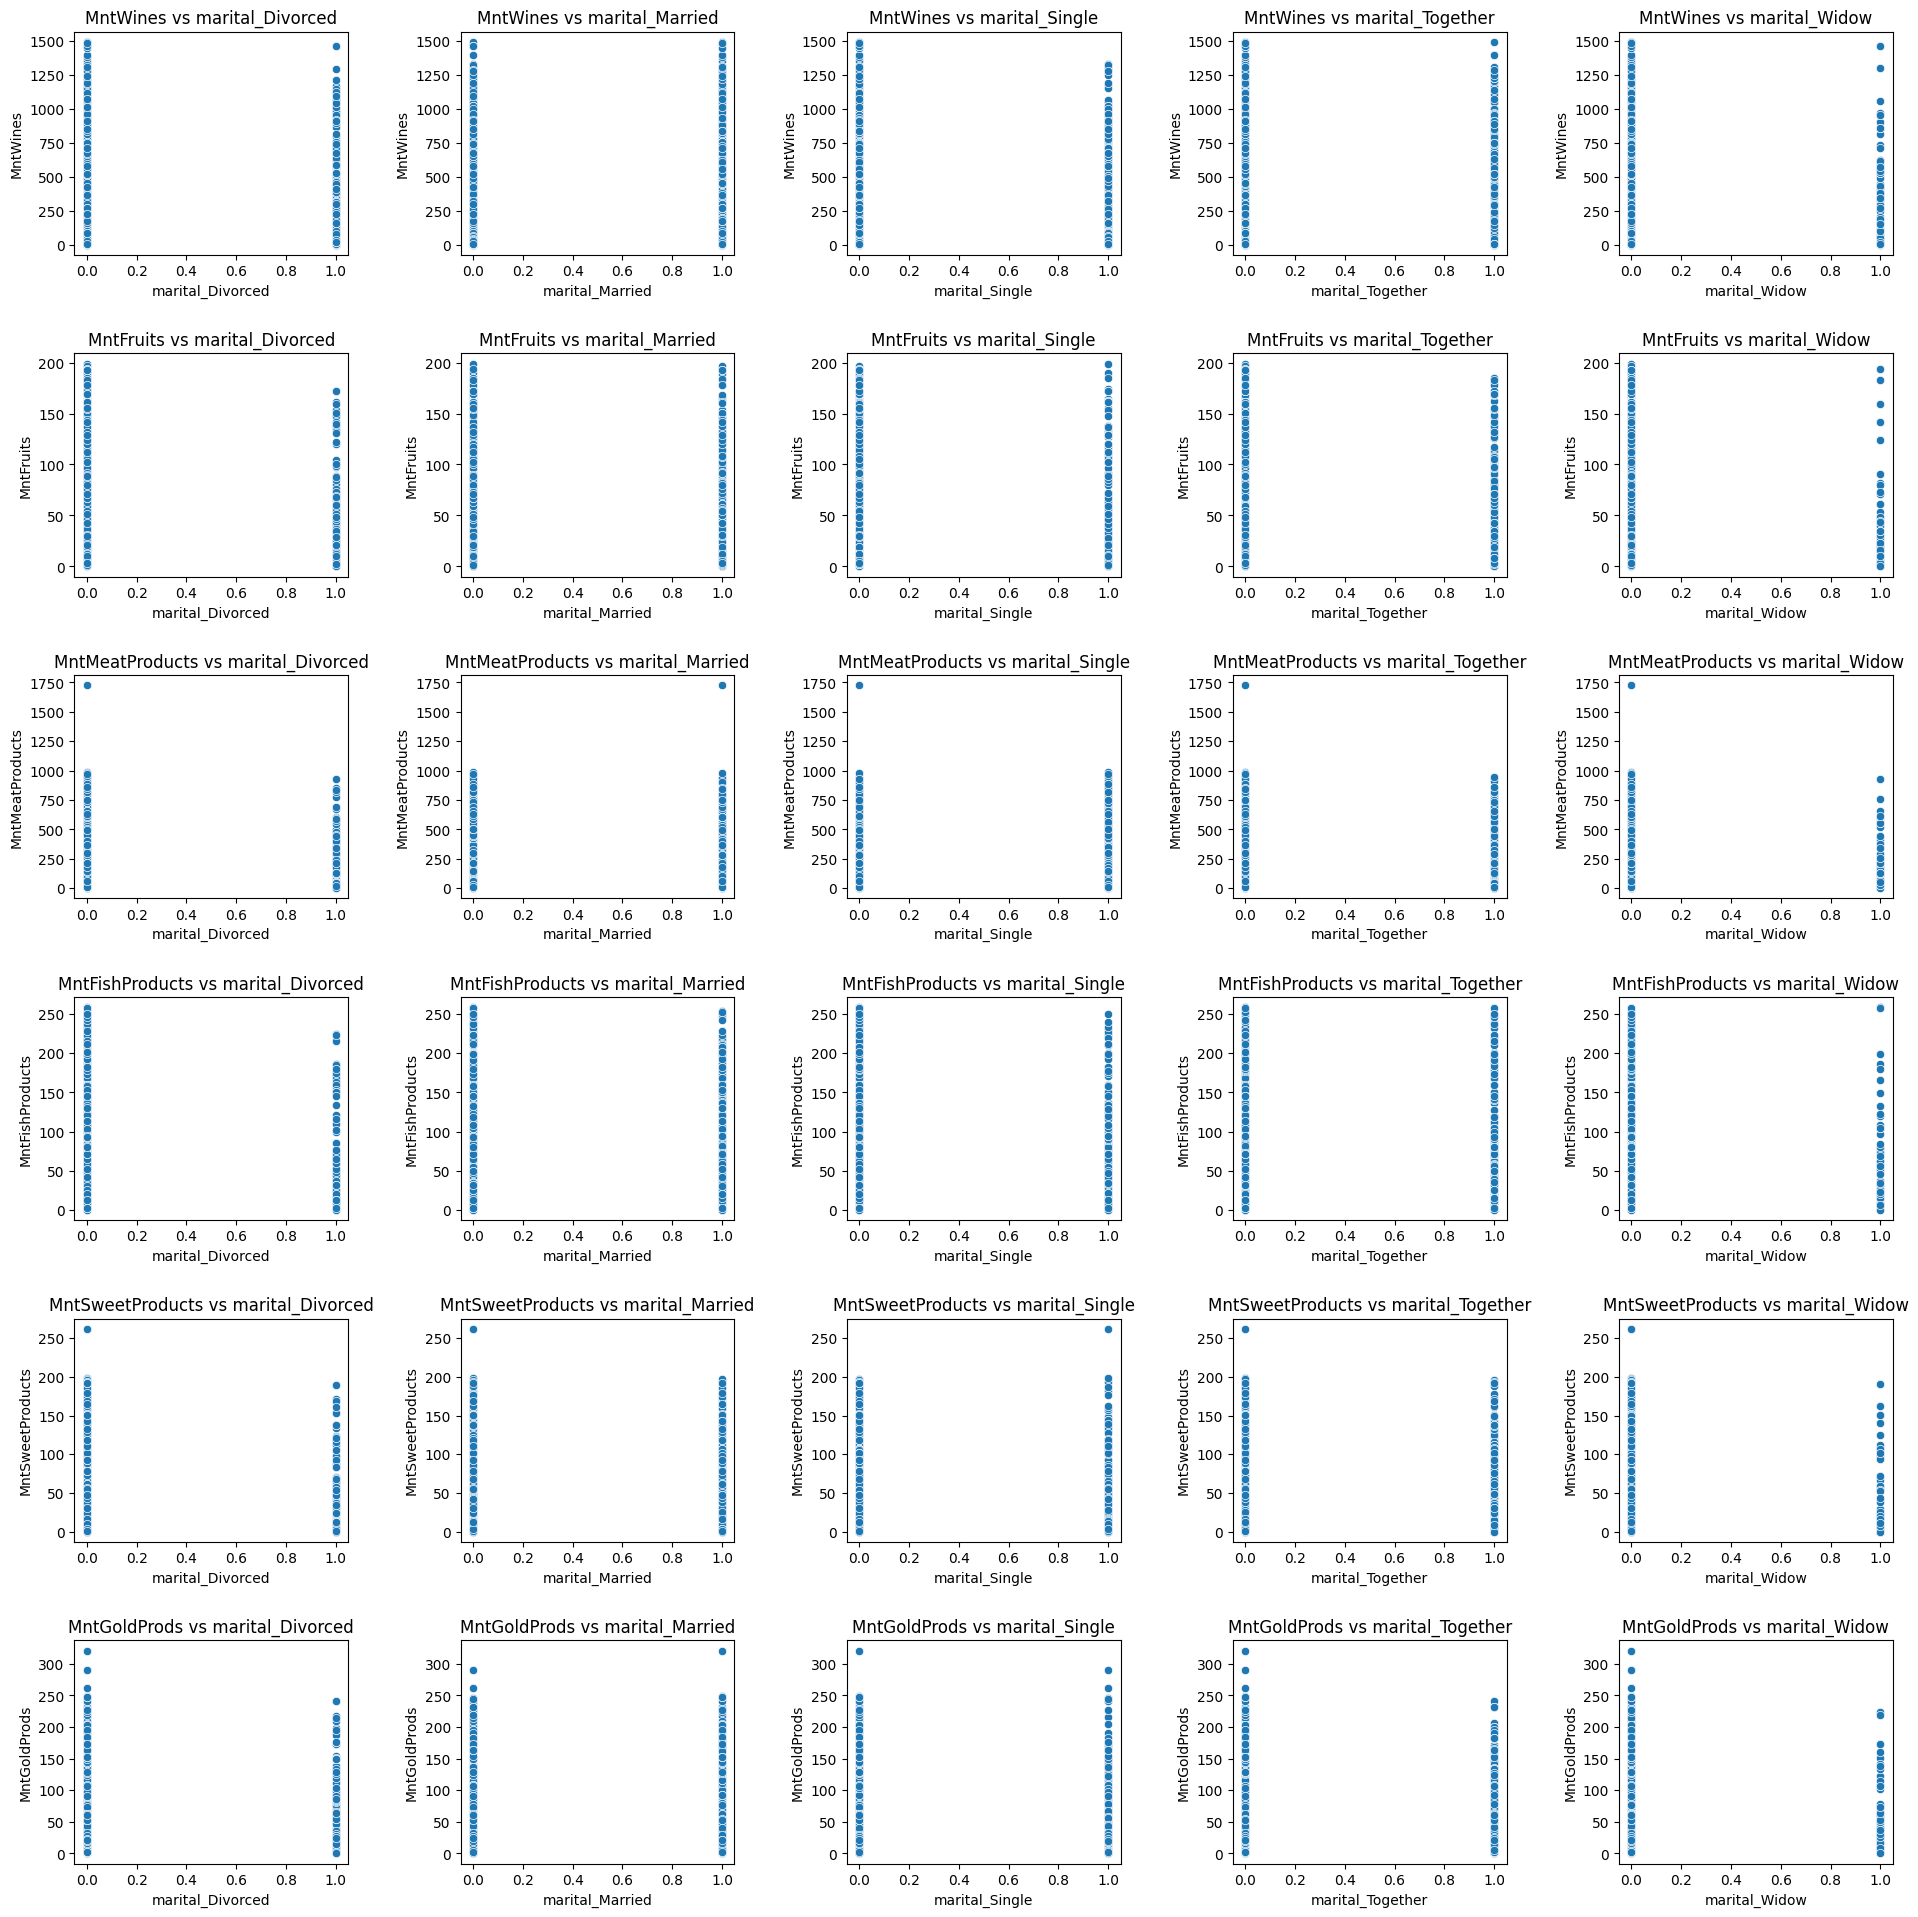

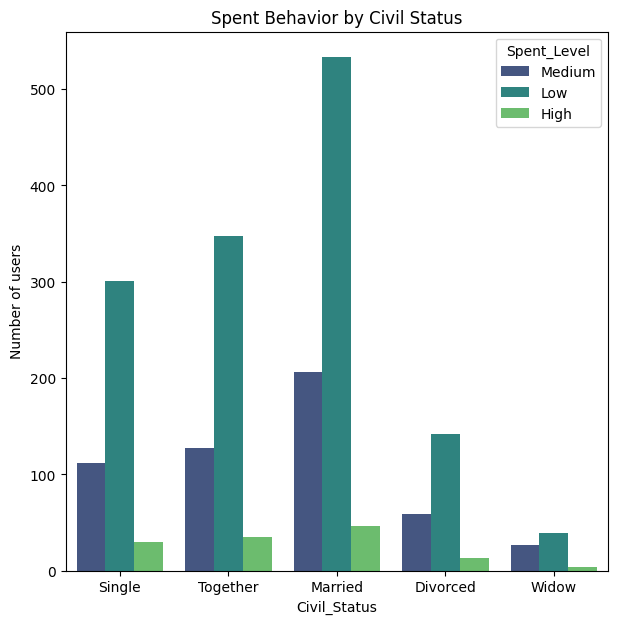

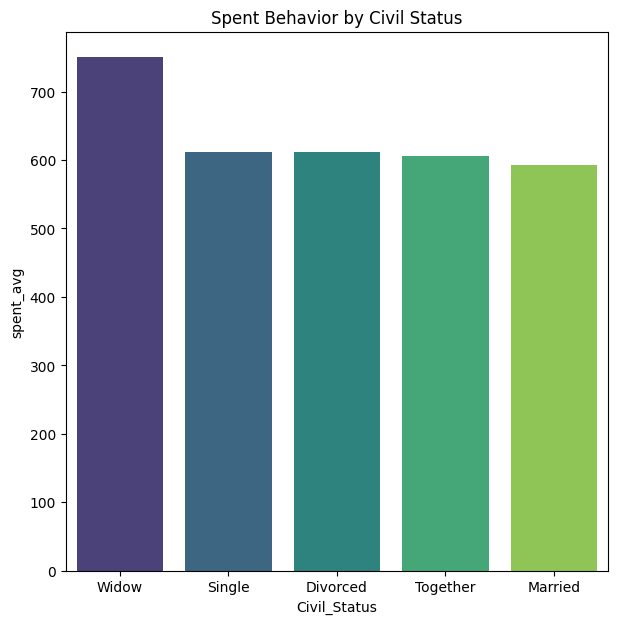

<Figure size 800x800 with 0 Axes>

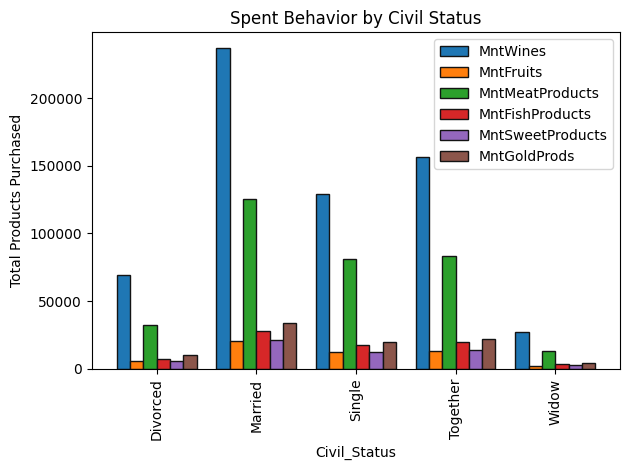

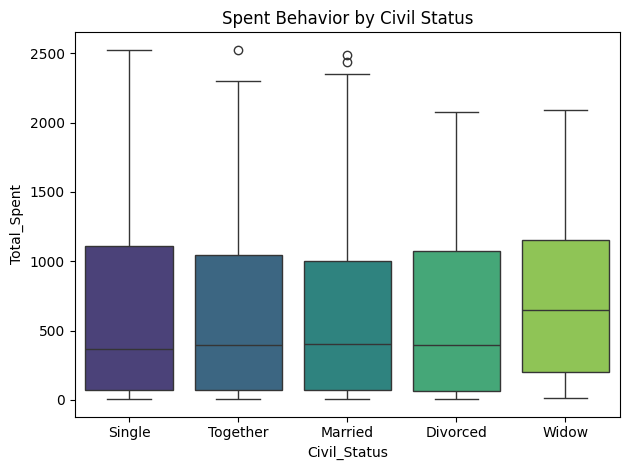

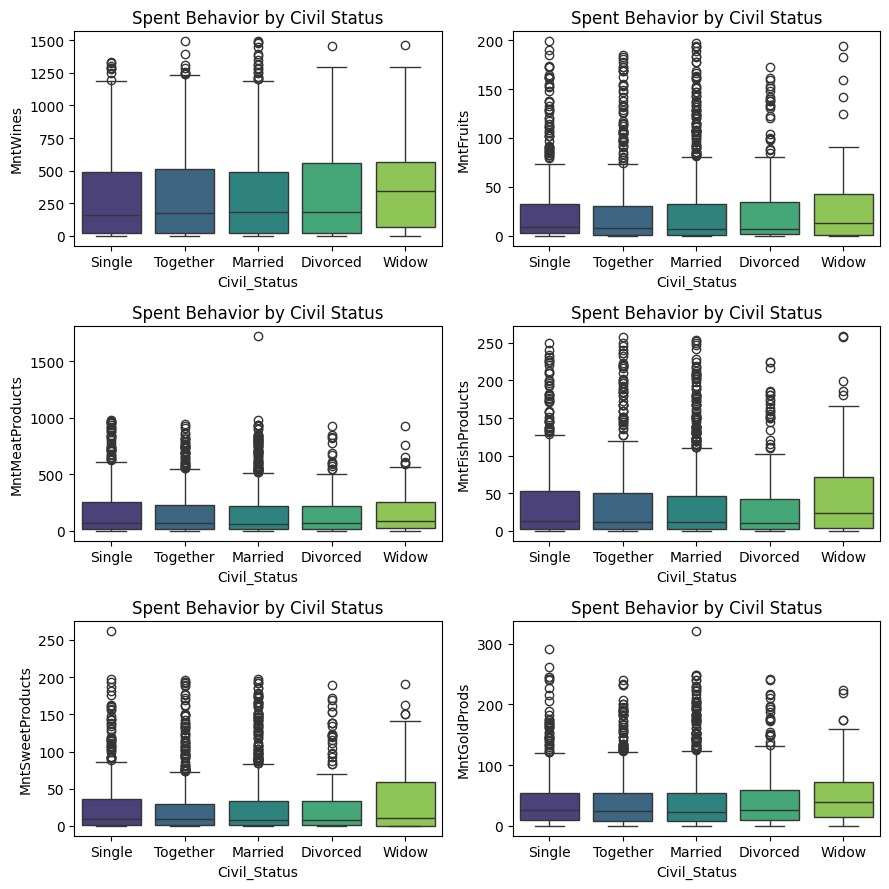

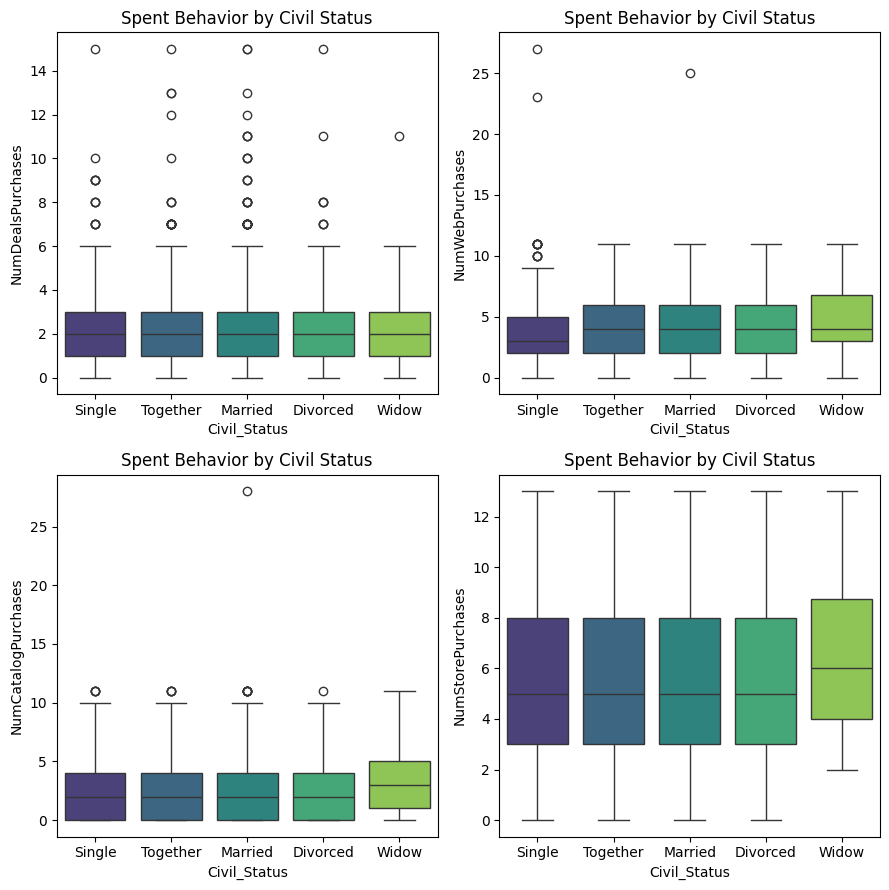

In [159]:
# Civil Status and Total Spent
civil_status_list = ["marital_Divorced","marital_Married","marital_Single","marital_Together","marital_Widow"]
items_types = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
fig = plt.figure(figsize=(8,8))
plot = 1
for i in range(len(civil_status_list)):
    plt.subplot(3,2,plot)    
    sns.scatterplot(data=data,x=civil_status_list[i], y="Total_Spent")
    sns.regplot(data=data,x=civil_status_list[i], y="Total_Spent",scatter=False, color="red")
    plot += 1
    plt.title("Spent Behavior by Civil Status")
    plt.tight_layout()
plt.show()

# Civil Status and Num Orders
fig = plt.figure(figsize=(8,8))
plot = 1
for i in range(len(civil_status_list)):
    plt.subplot(3,2,plot)    
    sns.scatterplot(data=data,x=civil_status_list[i], y="Num_Orders")
    sns.regplot(data=data,x=civil_status_list[i], y="Num_Orders",scatter=False, color="red")
    plot += 1
    plt.title("Spent Behavior by Civil Status")
    plt.tight_layout()
plt.show()

fig, axes = plt.subplots(len(purchases_channels), len(civil_status_list), figsize=(20, 20))
fig.tight_layout(pad=5.0)

# Generar scatterplots
for i, item in enumerate(purchases_channels):
    for j, status in enumerate(civil_status_list):
        sns.scatterplot(data=data, y=item, x=status, ax=axes[i, j])
        axes[i, j].set_title(f'{item} vs {status}')

plt.show()



fig, axes = plt.subplots(len(items_types), len(civil_status_list), figsize=(20, 20))
fig.tight_layout(pad=5.0)

# Generar scatterplots
for i, item in enumerate(items_types):
    for j, status in enumerate(civil_status_list):
        sns.scatterplot(data=data, y=item, x=status, ax=axes[i, j])
        axes[i, j].set_title(f'{item} vs {status}')

plt.show()

# Principal customers by Civil Status
fig = plt.figure(figsize=(7,7))
sns.countplot(data=data, x=data["Civil_Status"], hue="Spent_Level", palette='viridis')
plt.title("Spent Behavior by Civil Status")
plt.ylabel("Number of users")
plt.show()

# Average Spent by Civil Status
fig = plt.figure(figsize=(7,7))
plot = data.groupby("Civil_Status").Total_Spent.mean().sort_values(ascending=False).reset_index(name="spent_avg")
sns.barplot(data=plot, x="Civil_Status", y= "spent_avg", palette='viridis')
plt.title("Spent Behavior by Civil Status")
plt.show()

# Civil Status and most purchased type products
Ageplot = data.groupby("Civil_Status")[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]].sum().reset_index()
fig = plt.figure(figsize=(8,8))
Ageplot.plot(x='Civil_Status', y=items_types, kind='bar',  width=0.8, edgecolor='#131313')
plt.title("Spent Behavior by Civil Status")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

# Spent by Civil Status 2
sns.boxplot(data=data, y="Total_Spent", x="Civil_Status", palette="viridis")
plt.title("Spent Behavior by Civil Status")
plt.tight_layout()
plt.show()

# Civil Status and Products 
fig = plt.figure(figsize=(9,9))
plot = 1
for i in range(len(items_types)):
    plt.subplot(3,2,plot)
    sns.boxplot(data=data, x="Civil_Status", y=items_types[i],palette="viridis")
    plot += 1
    plt.title("Spent Behavior by Civil Status")
    plt.tight_layout()
plt.show()

# Civil Status and form of acquisition
fig = plt.figure(figsize=(9,9))
plot = 1
for i in range(len(purchases_channels)):
    plt.subplot(2,2,plot)
    sns.boxplot(data=data, x="Civil_Status", y=purchases_channels[i],palette="viridis")
    plot += 1
    plt.title("Spent Behavior by Civil Status")
    plt.tight_layout()
plt.show()


#### Purchasing Behavior by Family <a class="anchor" id="section2_4"></a>

**Plots**

```python
num_child = ['Kidhome', 'Teenhome']
fig = plt.figure(figsize=(7,7))
plot = 1
for i in range(len(num_child)):
    plt.subplot(2,1,plot)    
    sns.scatterplot(data=data, x=num_child[i], y="Total_Spent")
    sns.regplot(data=data, x=num_child[i], y="Total_Spent", scatter=False, color="red")
    plot += 1
    plt.title("Spent Behavior by Family")
    plt.ylim(bottom=0)  
    plt.tight_layout()
plt.show()

# Civil Status and Num Orders
fig = plt.figure(figsize=(7,7))
plot = 1
for i in range(len(num_child)):
    plt.subplot(2,1,plot)    
    sns.scatterplot(data=data, x=num_child[i], y="Num_Orders")
    sns.regplot(data=data, x=num_child[i], y="Num_Orders", scatter=False, color="red")
    plot += 1
    plt.title("Spent Behavior by Family")
    plt.tight_layout()
plt.show()

fig, axes = plt.subplots(len(purchases_channels), len(num_child), figsize=(20, 20))
fig.tight_layout(pad=5.0)

# Generar scatterplots
for i, item in enumerate(purchases_channels):
    for j, status in enumerate(num_child):
        sns.scatterplot(data=data, y=item, x=status, ax=axes[i, j])
        axes[i, j].set_title(f'{item} vs {status}')

plt.show()

fig, axes = plt.subplots(len(items_types), len(num_child), figsize=(20, 20))
fig.tight_layout(pad=5.0)

# Generar scatterplots
for i, item in enumerate(items_types):
    for j, status in enumerate(num_child):
        sns.scatterplot(data=data, y=item, x=status, ax=axes[i, j])
        axes[i, j].set_title(f'{item} vs {status}')

plt.show()

# Principal customers by Family
fig = plt.figure(figsize=(7,7))
sns.countplot(data=data, x=data["Children"], hue="Spent_Level", palette='viridis')
plt.title("Spent Behavior by Family")
plt.ylabel("Number of users")
plt.show()

# Average Spent by Family 
fig = plt.figure(figsize=(7,7))
plot = data.groupby(["Children", "Education"]).Total_Spent.mean().sort_values(ascending=False).reset_index(name="spent_avg")
sns.barplot(data=plot, x="Children", y= "spent_avg", palette='viridis', hue="Education")
plt.title("Spent Behavior by Family")
plt.show()

# Family and most purchased type products
Ageplot = data.groupby("Children")[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]].sum().reset_index()
fig = plt.figure(figsize=(7,7))
Ageplot.plot(x='Children', y=items_types, kind='bar',  width=0.8, edgecolor='#131313')
plt.title("Spent Behavior by Family")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

# Spent by Family 2
sns.boxplot(data=data, y="Total_Spent", x="Children", palette="viridis")
plt.title("Spent Behavior by Family")
plt.tight_layout()
plt.show()


fig = plt.figure(figsize=(7,7))
plot = 1
for i in range(len(items_types)):
    plt.subplot(3,2,plot)
    sns.boxplot(data=data, x="Children", y=items_types[i],palette="viridis")
    plot += 1
    plt.title("Spent Behavior by Family")
    plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(7,7))
plot = 1
for i in range(len(purchases_channels)):
    plt.subplot(2,2,plot)
    sns.boxplot(data=data, x="Children", y=purchases_channels[i],palette="viridis")
    plot += 1
    plt.title("Spent Behavior by Family")
    plt.tight_layout()
plt.show()
```
**Findings:**
- Surprisingly, it seems that more `kids` in the family equals fewer orders by the users.
- Our principal customer group is the childless group. Also, this group has the highest ticket spend. If we add `education` to the plot, we see that PhDs lead in this group.
- Fruit is the least purchased product and, again, wine is the most purchased.
- The groups “kid” and “both” order far less wine than the other two groups.
- The childless group seems unaffected by deals. They tend to shop online, via catalog, and especially in-store.
- It seems that the “teen” group tends to prefer shopping at the stores.


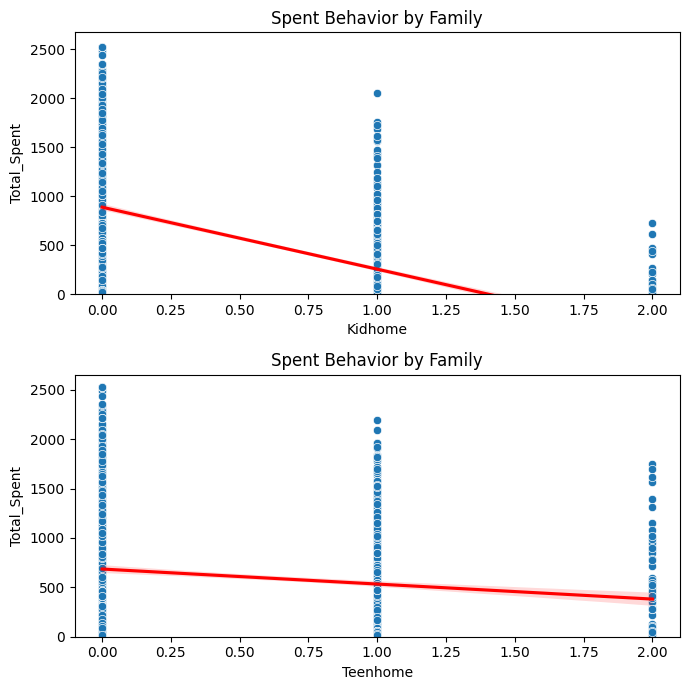

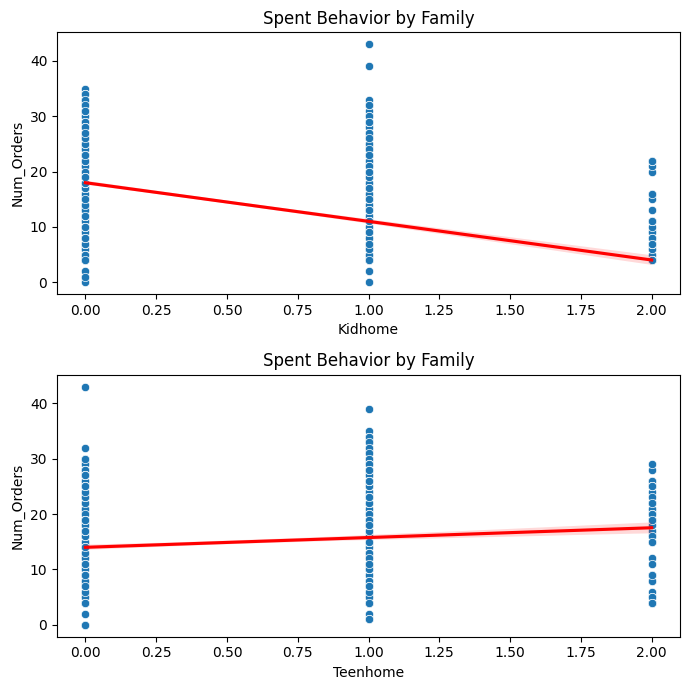

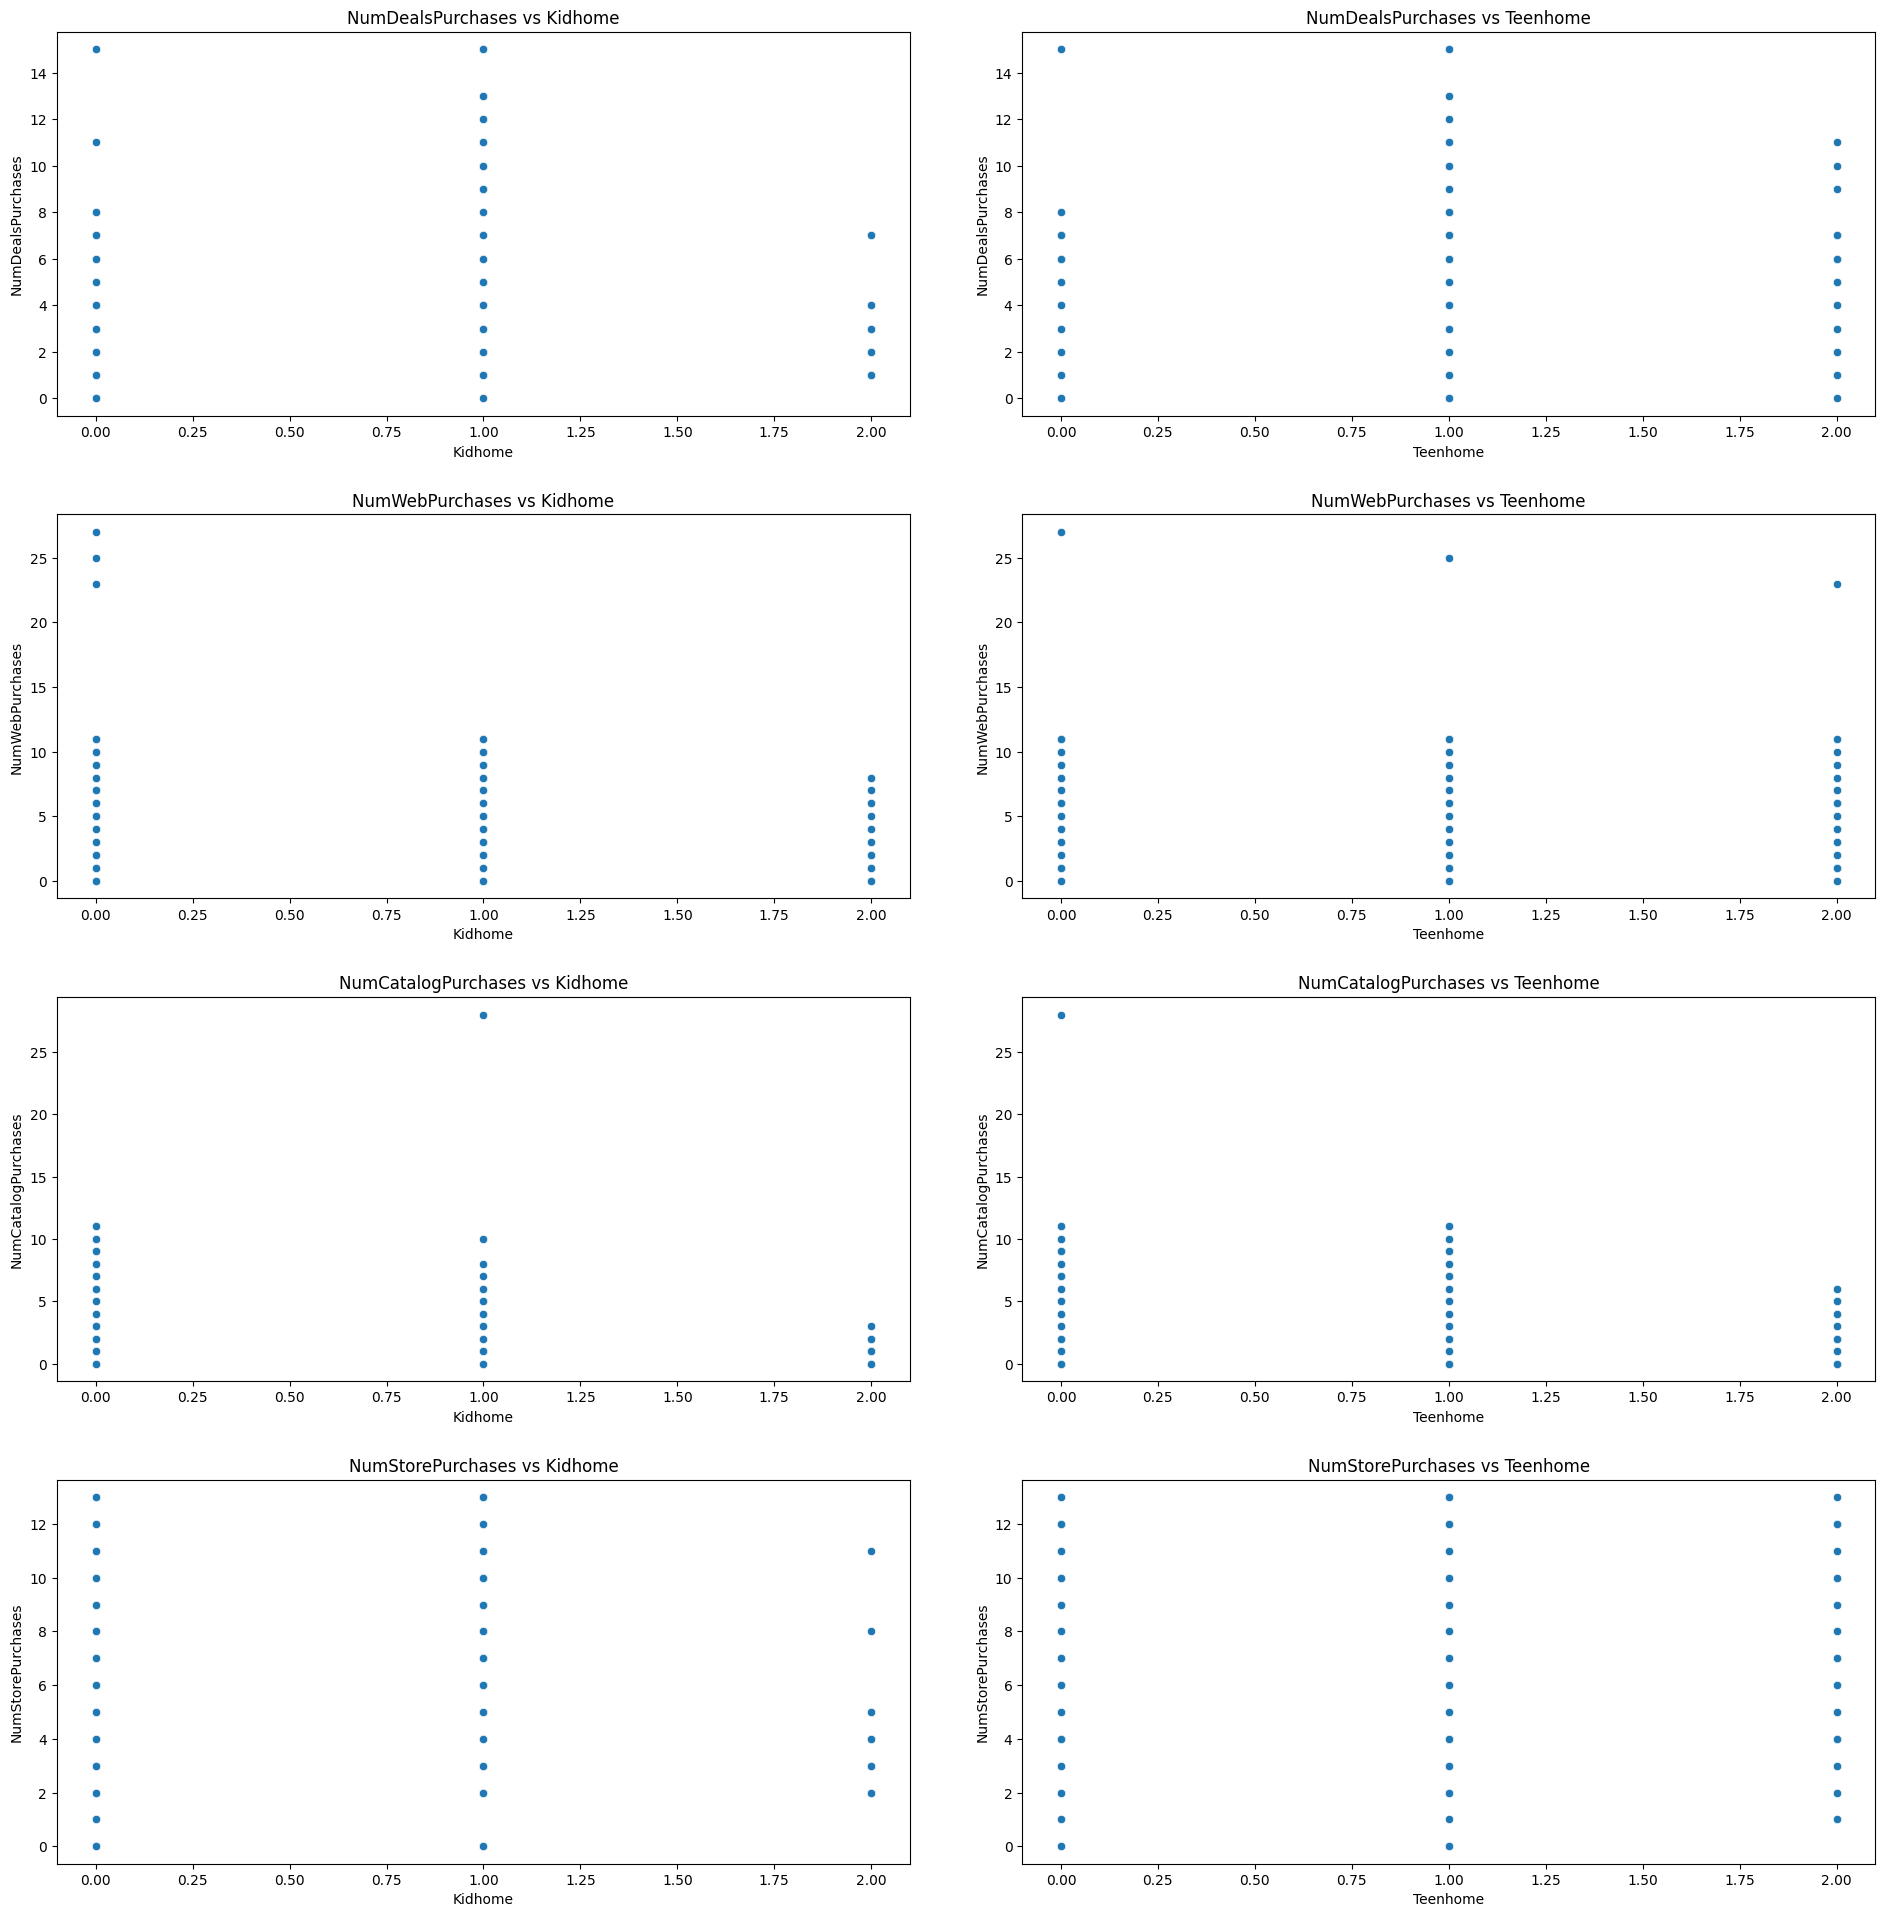

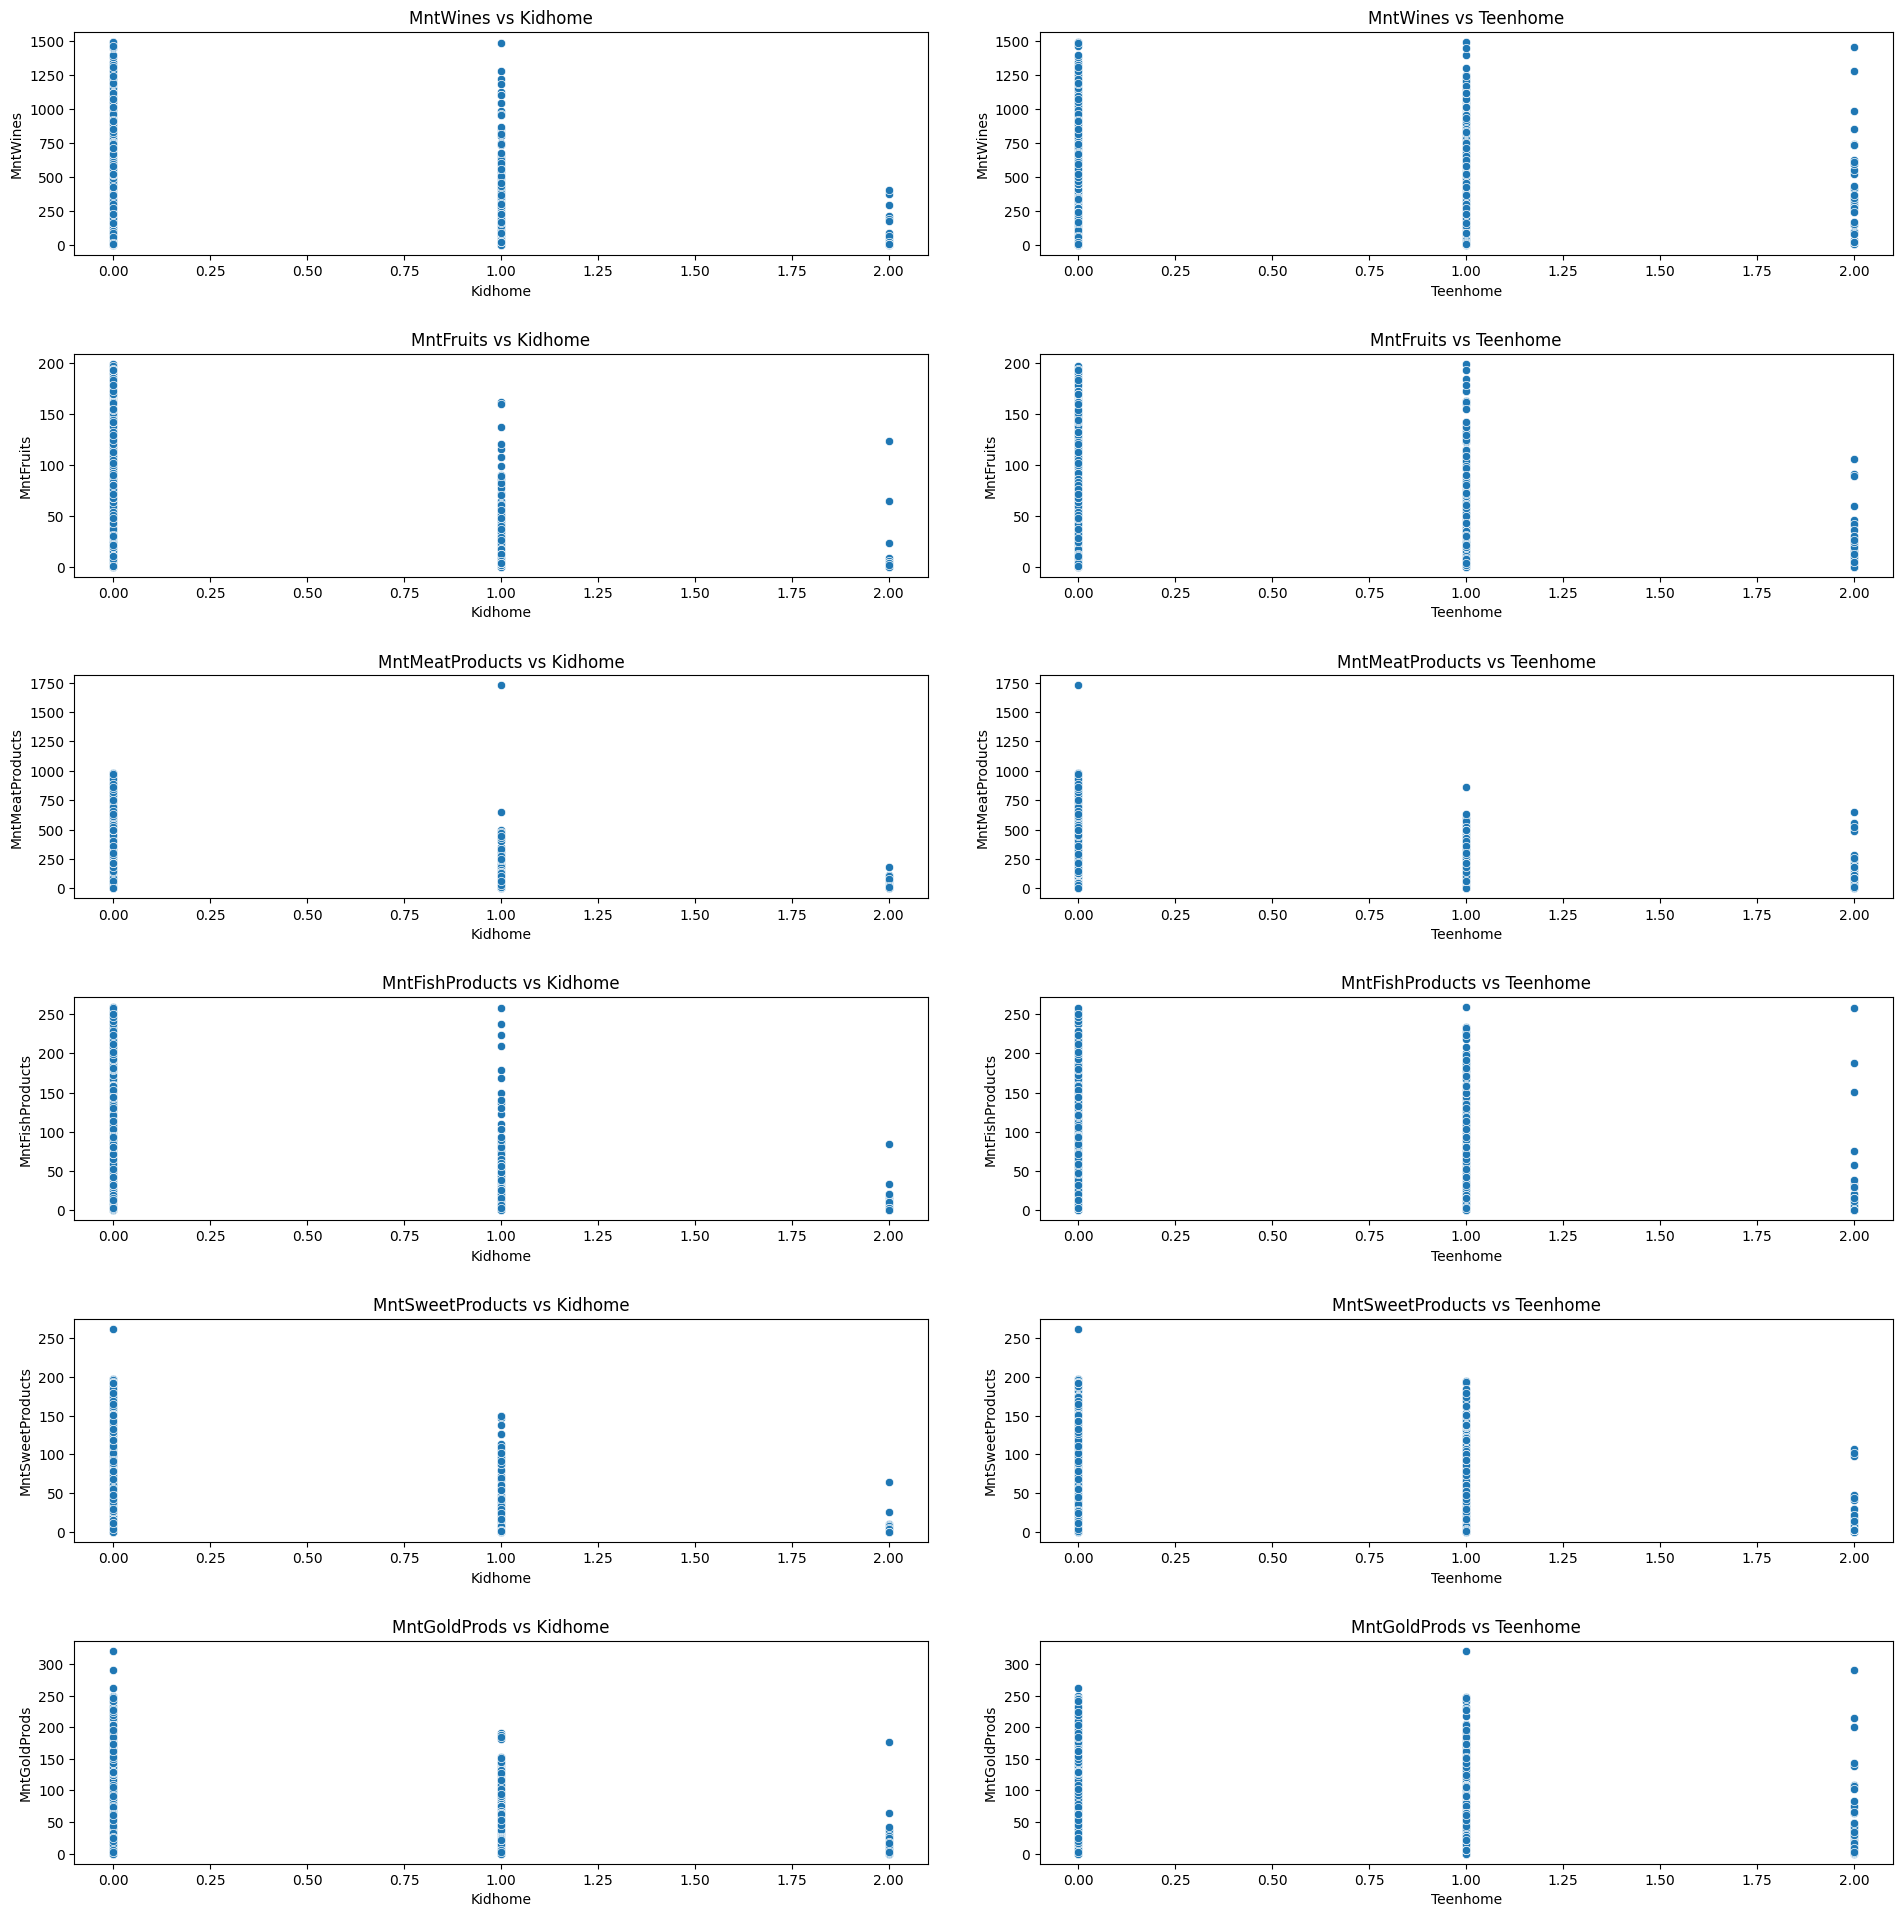

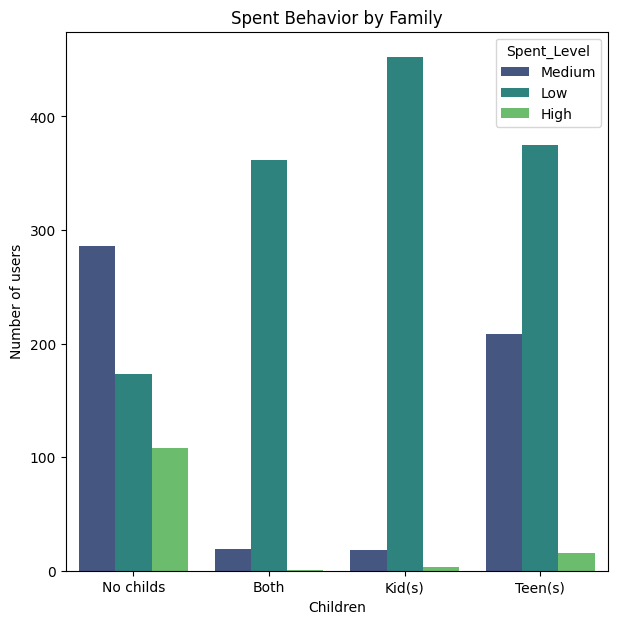

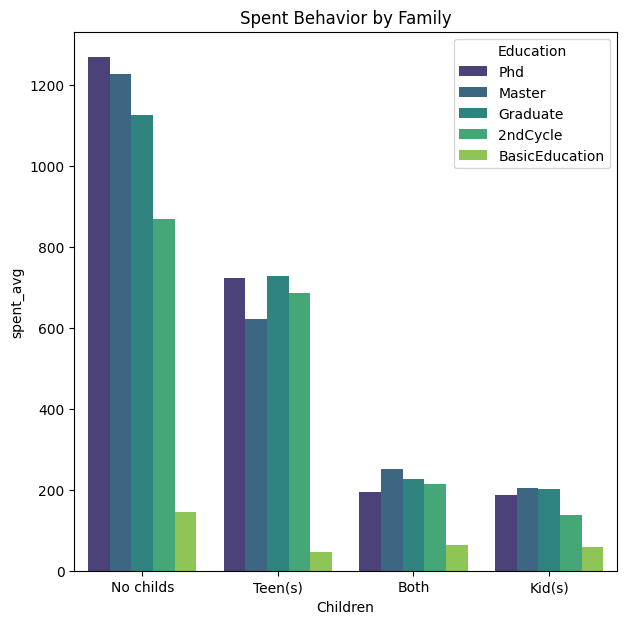

<Figure size 700x700 with 0 Axes>

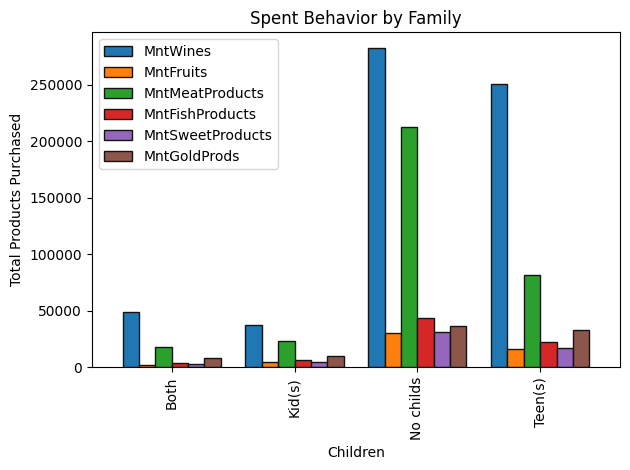

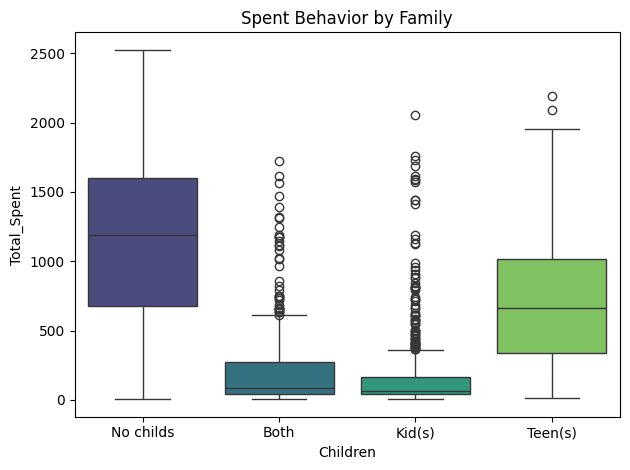

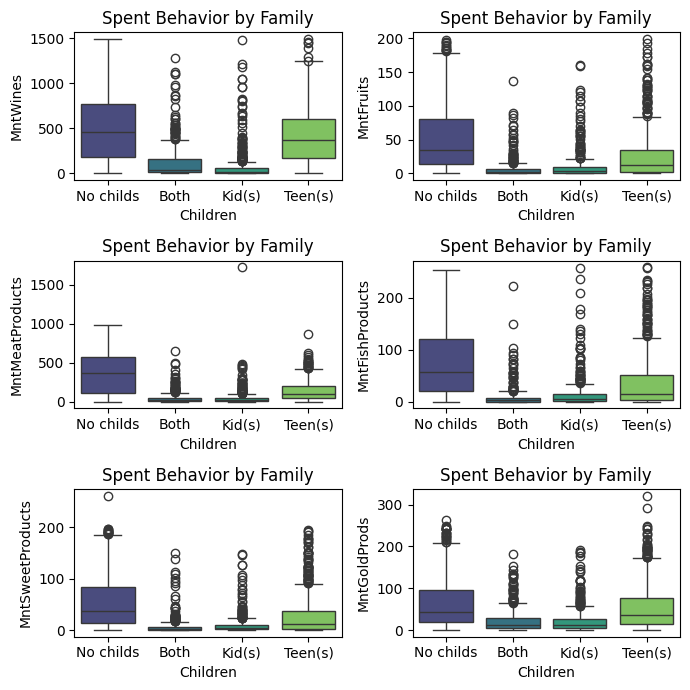

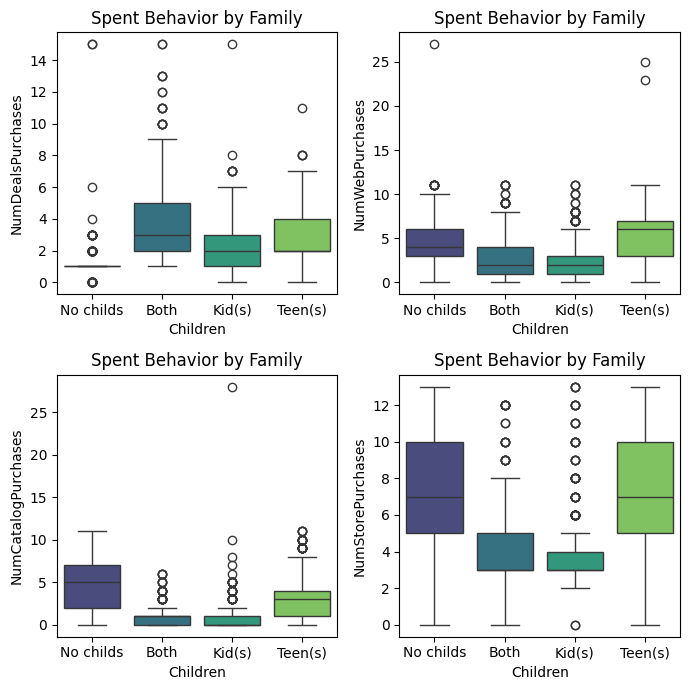

In [160]:
num_child = ['Kidhome', 'Teenhome']
fig = plt.figure(figsize=(7,7))
plot = 1
for i in range(len(num_child)):
    plt.subplot(2,1,plot)    
    sns.scatterplot(data=data, x=num_child[i], y="Total_Spent")
    sns.regplot(data=data, x=num_child[i], y="Total_Spent", scatter=False, color="red")
    plot += 1
    plt.title("Spent Behavior by Family")
    plt.ylim(bottom=0)  
    plt.tight_layout()
plt.show()

# Civil Status and Num Orders
fig = plt.figure(figsize=(7,7))
plot = 1
for i in range(len(num_child)):
    plt.subplot(2,1,plot)    
    sns.scatterplot(data=data, x=num_child[i], y="Num_Orders")
    sns.regplot(data=data, x=num_child[i], y="Num_Orders", scatter=False, color="red")
    plot += 1
    plt.title("Spent Behavior by Family")
    plt.tight_layout()
plt.show()

fig, axes = plt.subplots(len(purchases_channels), len(num_child), figsize=(20, 20))
fig.tight_layout(pad=5.0)

# Generar scatterplots
for i, item in enumerate(purchases_channels):
    for j, status in enumerate(num_child):
        sns.scatterplot(data=data, y=item, x=status, ax=axes[i, j])
        axes[i, j].set_title(f'{item} vs {status}')

plt.show()

fig, axes = plt.subplots(len(items_types), len(num_child), figsize=(20, 20))
fig.tight_layout(pad=5.0)

# Generar scatterplots
for i, item in enumerate(items_types):
    for j, status in enumerate(num_child):
        sns.scatterplot(data=data, y=item, x=status, ax=axes[i, j])
        axes[i, j].set_title(f'{item} vs {status}')

plt.show()

# Principal customers by Family
fig = plt.figure(figsize=(7,7))
sns.countplot(data=data, x=data["Children"], hue="Spent_Level", palette='viridis')
plt.title("Spent Behavior by Family")
plt.ylabel("Number of users")
plt.show()

# Average Spent by Family 
fig = plt.figure(figsize=(7,7))
plot = data.groupby(["Children", "Education"]).Total_Spent.mean().sort_values(ascending=False).reset_index(name="spent_avg")
sns.barplot(data=plot, x="Children", y= "spent_avg", palette='viridis', hue="Education")
plt.title("Spent Behavior by Family")
plt.show()

# Family and most purchased type products
Ageplot = data.groupby("Children")[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]].sum().reset_index()
fig = plt.figure(figsize=(7,7))
Ageplot.plot(x='Children', y=items_types, kind='bar',  width=0.8, edgecolor='#131313')
plt.title("Spent Behavior by Family")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

# Spent by Family 2
sns.boxplot(data=data, y="Total_Spent", x="Children", palette="viridis")
plt.title("Spent Behavior by Family")
plt.tight_layout()
plt.show()


fig = plt.figure(figsize=(7,7))
plot = 1
for i in range(len(items_types)):
    plt.subplot(3,2,plot)
    sns.boxplot(data=data, x="Children", y=items_types[i],palette="viridis")
    plot += 1
    plt.title("Spent Behavior by Family")
    plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(7,7))
plot = 1
for i in range(len(purchases_channels)):
    plt.subplot(2,2,plot)
    sns.boxplot(data=data, x="Children", y=purchases_channels[i],palette="viridis")
    plot += 1
    plt.title("Spent Behavior by Family")
    plt.tight_layout()
plt.show()

#### Complainings <a class="anchor" id="section2_5"></a>

The dataset has very few complainings (19). Let`s make a quick analyzis.

```python 
# Plot 1
complains = data[data["Complain"] == 1]
cross_tab = pd.crosstab(complains["Civil_Status"], complains["Education"])

cross_tab.plot(kind='bar', stacked=True)

plt.xlabel('Civil Status')
plt.ylabel('Count')
plt.title('Complains by Civil Status and Education')
plt.legend(title='Education')
plt.show()


# Plot 2
complains = data[data["Complain"] == 1]
cross_tab = pd.crosstab(complains["Age_Group"], complains["Children"])

cross_tab.plot(kind='bar', stacked=True)

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Complains by Age Group and Family')
plt.legend(title='Family')
plt.show()
```

**Findings:**
- Most complaints come from `Married` users who achieved the `Graduated` education level, which is logical because these are the most common `Civil Status` and education level in the dataset.
- On the other hand, most complaints are tied if we compare them by `Group Age`. Both of these groups, 39-53 and 54-68, have the same number of complaints (6).



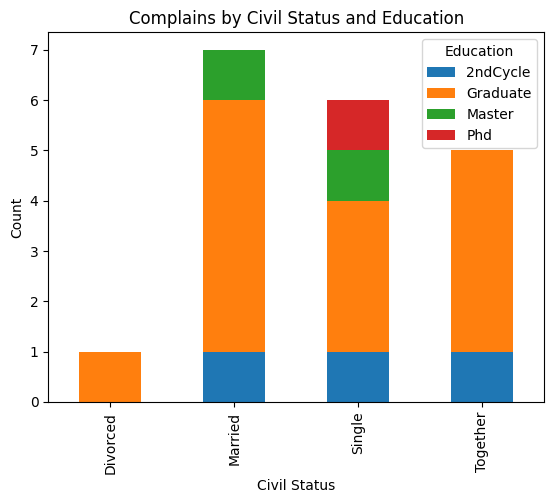

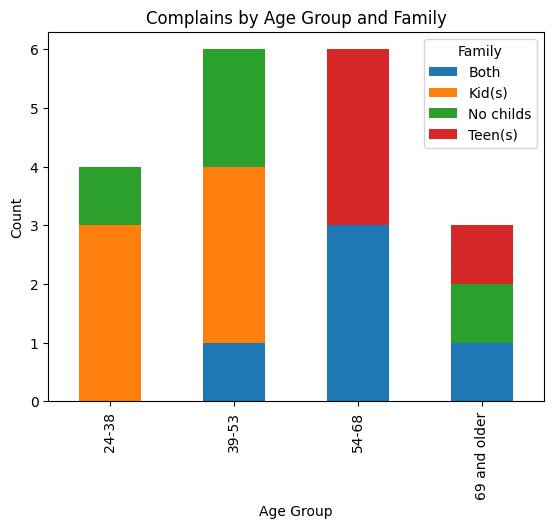

In [161]:

complains = data[data["Complain"] == 1]
cross_tab = pd.crosstab(complains["Civil_Status"], complains["Education"])

cross_tab.plot(kind='bar', stacked=True)

# Añadir etiquetas y título
plt.xlabel('Civil Status')
plt.ylabel('Count')
plt.title('Complains by Civil Status and Education')
plt.legend(title='Education')
plt.show()


###
complains = data[data["Complain"] == 1]
cross_tab = pd.crosstab(complains["Age_Group"], complains["Children"])

cross_tab.plot(kind='bar', stacked=True)

# Añadir etiquetas y título
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Complains by Age Group and Family')
plt.legend(title='Family')
plt.show()

### Conclusion: <a class="anchor" id="conclusion"></a>

* Wine is the most popular product category. 
* The company needs to revise their ‘deals’ because these are not very impactful. 
* If this dataset is a real representation of the entire population (clients), they need to focus on attracting more customers with Basic Education and 2nd Grade Education. 
* The complaint rate is very low; they need to maintain this. 
* Customers with kids don’t order very often. The company needs to improve their marketing strategy to attract new users.